In [786]:
import pandas as pd
import numpy as np

In [787]:
dfIF = pd.read_csv("recent_implicit_feedback.csv", sep=";", header=0, index_col=None)
dfIF.head()

,id,userID,objectID,eventType,eventValue,lastModified
0,3706361,2705429,263,pageview,1,2018-07-16 00:04:42
1,3706364,2705430,5734,pageview,1,2018-07-16 00:07:05
2,3706366,2705431,324,pageview,1,2018-07-16 00:11:04
3,3706369,2705431,108,pageview,1,2018-07-16 00:11:48
4,3706372,2705433,303,pageview,1,2018-07-16 01:03:41


In [788]:
algVariants = [{"name":"doc2vec", "params": "128,1", "aggregation": "last", "diversity": "no", "novelty": "yes"},
            {"name":"doc2vec", "params": "128,1", "aggregation": "temporal", "diversity": "yes", "novelty": "no"},
            {"name":"doc2vec", "params": "32,5", "aggregation": "mean", "diversity": "no", "novelty": "no"},
            {"name":"doc2vec", "params": "32,5", "aggregation": "mean", "diversity": "yes", "novelty": "no"},
            {"name":"doc2vec", "params": "128,5", "aggregation": "max", "diversity": "no", "novelty": "yes"},
            {"name":"attributeCosineSim", "params": "noSameObjects", "aggregation": "temporal", "diversity": "no", "novelty": "yes"},
            {"name":"attributeCosineSim", "params": "sameAllowed", "aggregation": "mean", "diversity": "no", "novelty": "yes"},
            {"name":"attributeCosineSim", "params": "sameAllowed", "aggregation": "window10", "diversity": "no", "novelty": "no"},
            {"name":"word2vec", "params": "64,5", "aggregation": "mean", "diversity": "yes", "novelty": "no"},
            {"name":"word2vec", "params": "32,5", "aggregation": "temporal", "diversity": "no", "novelty": "yes"},
            {"name":"word2vec", "params": "128,3", "aggregation": "last", "diversity": "no", "novelty": "no"},
            {"name":"word2vec", "params": "32,3", "aggregation": "window10", "diversity": "no", "novelty": "no"}]
#resOO["algorithm"] = algVariants
#resOO

[Text(0, 0.5, 'R^2'),
 Text(0, 1.5, '-mae'),
 Text(0, 2.5, 'map'),
 Text(0, 3.5, 'auc'),
 Text(0, 4.5, 'mrr'),
 Text(0, 5.5, 'p5'),
 Text(0, 6.5, 'p10'),
 Text(0, 7.5, 'r5'),
 Text(0, 8.5, 'r10'),
 Text(0, 9.5, 'nDCG10'),
 Text(0, 10.5, 'nDCG100'),
 Text(0, 11.5, 'nDCG'),
 Text(0, 12.5, 'novelty5_t'),
 Text(0, 13.5, 'novelty10_t'),
 Text(0, 14.5, 'novelty5_u'),
 Text(0, 15.5, 'novelty10_u'),
 Text(0, 16.5, 'ild5'),
 Text(0, 17.5, 'ild10')]

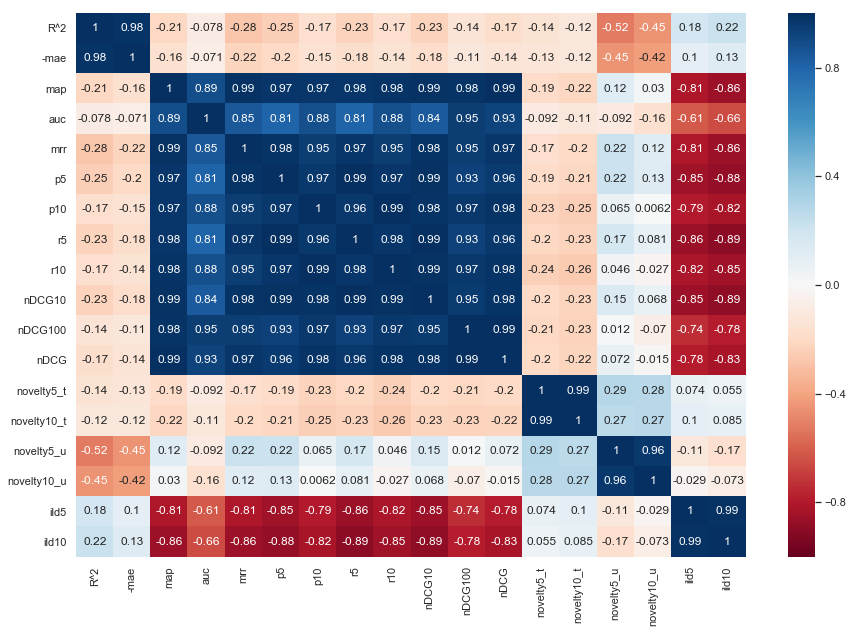

In [789]:
#get data from off-line evaluation
df = pd.read_csv("../../resultsWithNovDiv_32_0dot01Temporal.csv", sep=";", header=0, index_col=None)
df.user_novelty5 = 1-df.user_novelty5
df.user_novelty10 = 1-df.user_novelty10
df.mae = -df.mae
df.rename(columns={"r2Score":"R^2", "mae":"-mae", "aucScore":"auc", "nDCGFull":"nDCG", "novelty5":"novelty5_t", "novelty10":"novelty10_t", "user_novelty5":"novelty5_u", "user_novelty10":"novelty10_u"}, inplace=True)
del df["uid"]

%matplotlib inline
dfGroup = df.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMean = dfGroup.mean()
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(dfMean.corr(method='pearson'), annot=True, cmap="RdBu", vmin=-1, vmax=1)
ax.set_xticks(np.asarray(range(len(dfMean.columns)))+0.5, minor=False)
ax.set_xticklabels(dfMean.columns)

ax.set_yticks(np.asarray(range(len(dfMean.columns)))+0.5, minor=False)
ax.set_yticklabels(dfMean.columns)
#df = df[["alg","params","recAlg","noveltyEnhance","diversityEnhance","-mae", "auc", "mrr", "nDCG100","novelty10_t","novelty10_u","ild10"]]

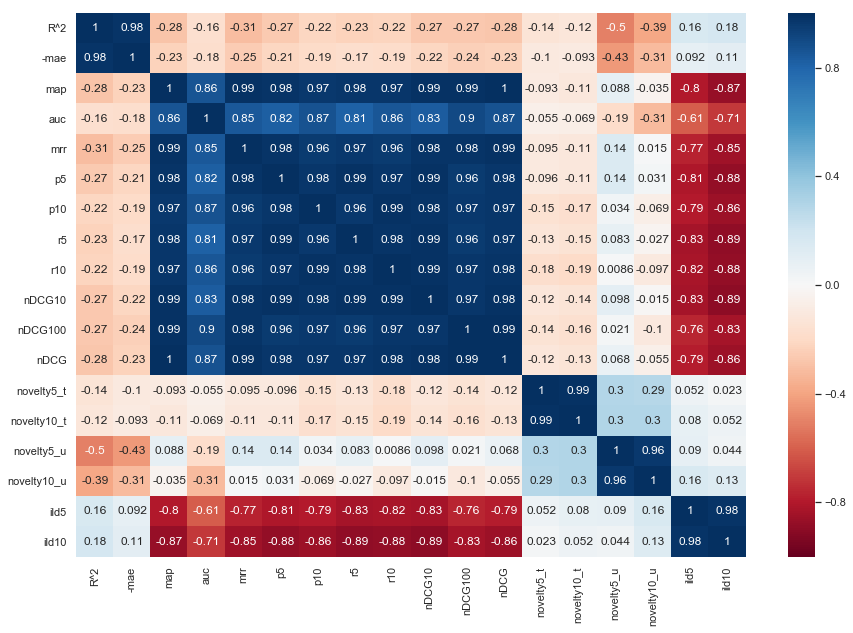

In [790]:
#get data from off-line evaluation
df = pd.read_csv("../../resultsWithNovDiv_32_0dot01Temporal.csv", sep=";", header=0, index_col=None)
df.user_novelty5 = 1-df.user_novelty5
df.user_novelty10 = 1-df.user_novelty10
df.mae = -df.mae
df.rename(columns={"r2Score":"R^2", "mae":"-mae", "aucScore":"auc", "nDCGFull":"nDCG", "novelty5":"novelty5_t", "novelty10":"novelty10_t", "user_novelty5":"novelty5_u", "user_novelty10":"novelty10_u"}, inplace=True)
del df["uid"]

%matplotlib inline
dfGroup = df.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMean = dfGroup.mean()
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(dfMean.corr(method='spearman'), annot=True, cmap="RdBu", vmin=-1, vmax=1)
ax.set_xticks(np.asarray(range(len(dfMean.columns)))+0.5, minor=False)
ax.set_xticklabels(dfMean.columns)

ax.set_yticks(np.asarray(range(len(dfMean.columns)))+0.5, minor=False)
ax.set_yticklabels(dfMean.columns)
#df = df[["alg","params","recAlg","noveltyEnhance","diversityEnhance","-mae", "auc", "mrr", "nDCG100","novelty10_t","novelty10_u","ild10"]]

plt.savefig("offline_correlations2.png",dpi=300)

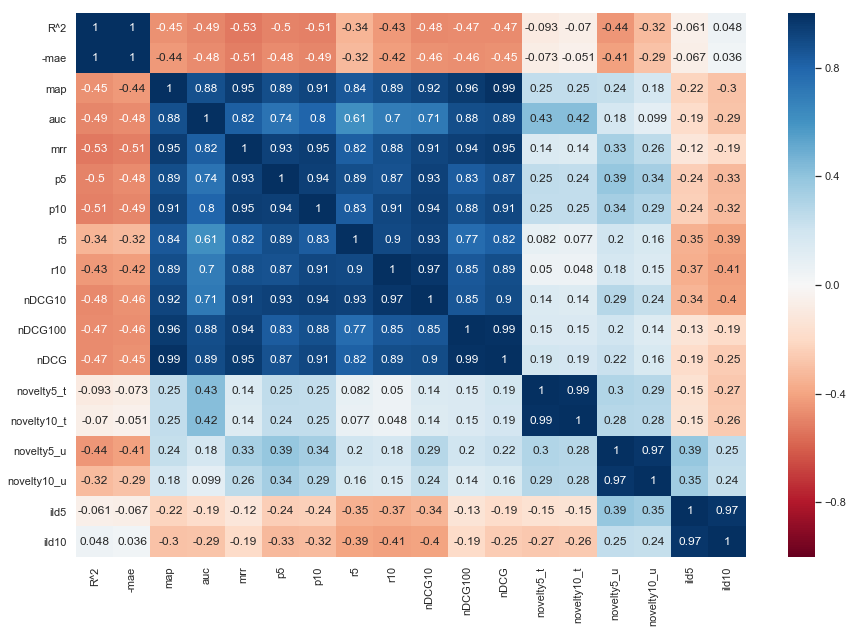

In [791]:
#get data from off-line evaluation - only for certain algorithms
df = pd.read_csv("../../resultsWithNovDiv_32_0dot01Temporal.csv", sep=";", header=0, index_col=None)
df.user_novelty5 = 1-df.user_novelty5
df.user_novelty10 = 1-df.user_novelty10
df.mae = -df.mae
df.rename(columns={"r2Score":"R^2", "mae":"-mae", "aucScore":"auc", "nDCGFull":"nDCG", "novelty5":"novelty5_t", "novelty10":"novelty10_t", "user_novelty5":"novelty5_u", "user_novelty10":"novelty10_u"}, inplace=True)
del df["uid"]

%matplotlib inline
df = df.loc[df.alg=="doc2vec"]

dfGroup = df.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMean = dfGroup.mean()
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(dfMean.corr(method='spearman'), annot=True, cmap="RdBu", vmin=-1, vmax=1)
ax.set_xticks(np.asarray(range(len(dfMean.columns)))+0.5, minor=False)
ax.set_xticklabels(dfMean.columns)

ax.set_yticks(np.asarray(range(len(dfMean.columns)))+0.5, minor=False)
ax.set_yticklabels(dfMean.columns)
#df = df[["alg","params","recAlg","noveltyEnhance","diversityEnhance","-mae", "auc", "mrr", "nDCG100","novelty10_t","novelty10_u","ild10"]]

plt.savefig("offline_correlations_doc2vec.png",dpi=300)

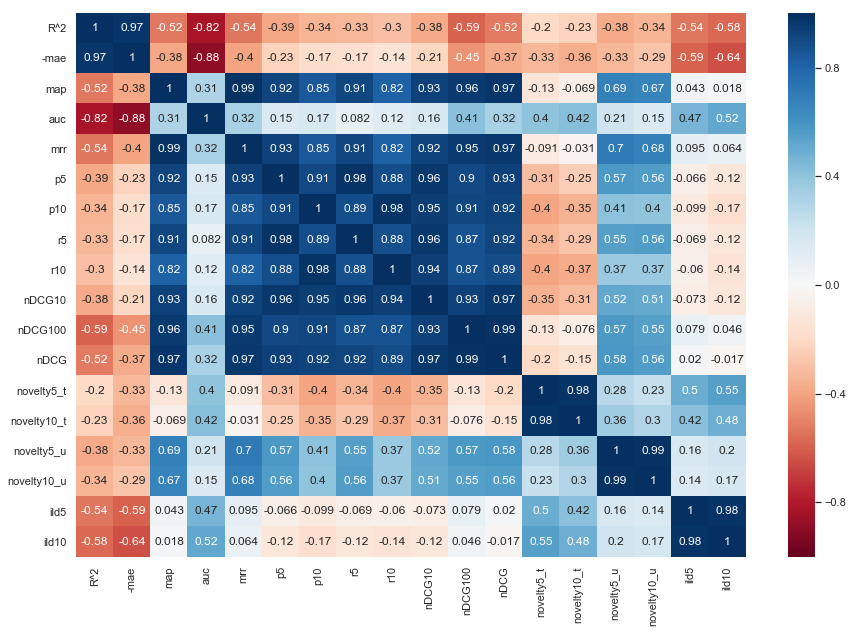

In [792]:
#get data from off-line evaluation - only for certain algorithms
df = pd.read_csv("../../resultsWithNovDiv_32_0dot01Temporal.csv", sep=";", header=0, index_col=None)
df.user_novelty5 = 1-df.user_novelty5
df.user_novelty10 = 1-df.user_novelty10
df.mae = -df.mae
df.rename(columns={"r2Score":"R^2", "mae":"-mae", "aucScore":"auc", "nDCGFull":"nDCG", "novelty5":"novelty5_t", "novelty10":"novelty10_t", "user_novelty5":"novelty5_u", "user_novelty10":"novelty10_u"}, inplace=True)
del df["uid"]

%matplotlib inline
df = df.loc[df.alg=="attributeCosineSim"]

dfGroup = df.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMean = dfGroup.mean()
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(dfMean.corr(method='spearman'), annot=True, cmap="RdBu", vmin=-1, vmax=1)
ax.set_xticks(np.asarray(range(len(dfMean.columns)))+0.5, minor=False)
ax.set_xticklabels(dfMean.columns)

ax.set_yticks(np.asarray(range(len(dfMean.columns)))+0.5, minor=False)
ax.set_yticklabels(dfMean.columns)
#df = df[["alg","params","recAlg","noveltyEnhance","diversityEnhance","-mae", "auc", "mrr", "nDCG100","novelty10_t","novelty10_u","ild10"]]

plt.savefig("offline_correlations_vsm.png",dpi=300)

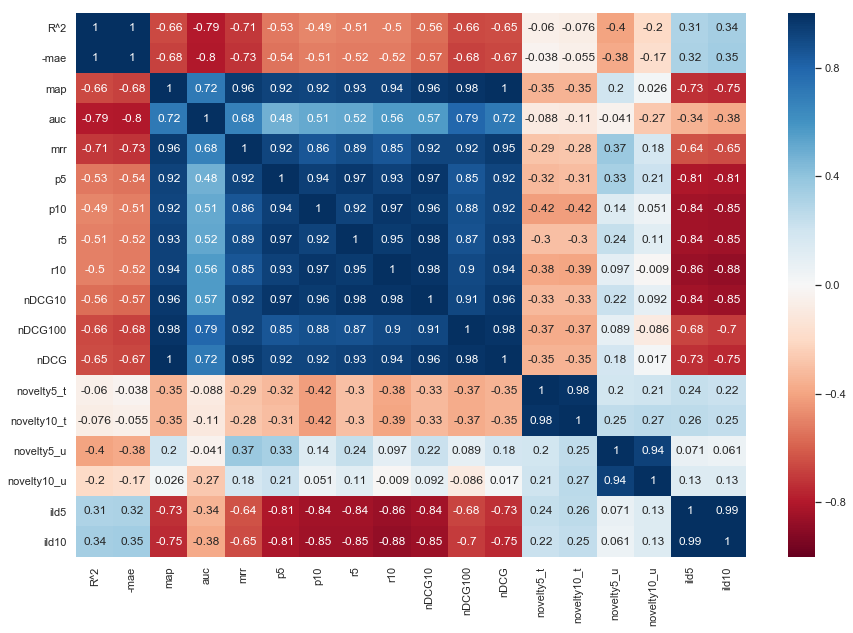

In [793]:
#get data from off-line evaluation - only for certain algorithms
df = pd.read_csv("../../resultsWithNovDiv_32_0dot01Temporal.csv", sep=";", header=0, index_col=None)
df.user_novelty5 = 1-df.user_novelty5
df.user_novelty10 = 1-df.user_novelty10
df.mae = -df.mae
df.rename(columns={"r2Score":"R^2", "mae":"-mae", "aucScore":"auc", "nDCGFull":"nDCG", "novelty5":"novelty5_t", "novelty10":"novelty10_t", "user_novelty5":"novelty5_u", "user_novelty10":"novelty10_u"}, inplace=True)
del df["uid"]

%matplotlib inline
df = df.loc[df.alg=="word2vec"]

dfGroup = df.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMean = dfGroup.mean()
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(dfMean.corr(method='spearman'), annot=True, cmap="RdBu", vmin=-1, vmax=1)
ax.set_xticks(np.asarray(range(len(dfMean.columns)))+0.5, minor=False)
ax.set_xticklabels(dfMean.columns)

ax.set_yticks(np.asarray(range(len(dfMean.columns)))+0.5, minor=False)
ax.set_yticklabels(dfMean.columns)
#df = df[["alg","params","recAlg","noveltyEnhance","diversityEnhance","-mae", "auc", "mrr", "nDCG100","novelty10_t","novelty10_u","ild10"]]

plt.savefig("offline_correlations_word2vec.png",dpi=300)

In [794]:
#get data from off-line evaluation - only for certain algorithms
df = pd.read_csv("../../resultsWithNovDiv_32_0dot01Temporal.csv", sep=";", header=0, index_col=None)
df.user_novelty5 = 1-df.user_novelty5
df.user_novelty10 = 1-df.user_novelty10
df.mae = -df.mae
df.rename(columns={"r2Score":"R^2", "mae":"-mae", "aucScore":"auc", "nDCGFull":"nDCG", "novelty5":"novelty5_t", "novelty10":"novelty10_t", "user_novelty5":"novelty5_u", "user_novelty10":"novelty10_u"}, inplace=True)
del df["uid"]

dfGroup = df.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMean = dfGroup.mean()

dfGroup = df.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMean = dfGroup.mean()
dfMean.reset_index(inplace=True)
dfMean.head()


,alg,params,recAlg,noveltyEnhance,diversityEnhance,R^2,-mae,map,auc,mrr,...,r10,nDCG10,nDCG100,nDCG,novelty5_t,novelty10_t,novelty5_u,novelty10_u,ild5,ild10
0,attributeCosineSim,noSameObjects,last,no,no,-91.750598,-0.374788,0.098748,0.736651,0.134822,...,0.165066,0.117625,0.191722,0.267832,0.218268,0.218839,0.901053,0.914737,0.159434,0.213166
1,attributeCosineSim,noSameObjects,last,no,yes,-91.789105,-0.375608,0.095850,0.738127,0.132137,...,0.158286,0.114146,0.189717,0.265962,0.226804,0.225748,0.905263,0.913158,0.160662,0.214095
2,attributeCosineSim,noSameObjects,last,yes,no,-91.750598,-0.374788,0.100174,0.736651,0.135567,...,0.175693,0.123154,0.194092,0.270209,0.218804,0.219361,0.900351,0.914211,0.199776,0.240654
3,attributeCosineSim,noSameObjects,last,yes,yes,-91.789105,-0.375608,0.097306,0.738127,0.133062,...,0.167251,0.118906,0.191787,0.268033,0.228042,0.226407,0.902807,0.913860,0.201126,0.242358
4,attributeCosineSim,noSameObjects,max,no,no,-108.691148,-0.422874,0.103098,0.794945,0.141116,...,0.172822,0.120669,0.215467,0.278476,0.223407,0.222772,0.893333,0.898772,0.234144,0.271930


In [795]:
selectedRes = map(lambda x: dfMean.loc[(dfMean.alg == x["name"]) & (dfMean.params == x["params"]) & (dfMean.recAlg == x["aggregation"]) & (dfMean.diversityEnhance == x["novelty"])  & (dfMean.noveltyEnhance == x["diversity"])  ], algVariants )
#selectedRes = map(lambda x: df.loc[(df.alg == x["name"]) ], algVariants )

In [796]:
lst = list(selectedRes)
lst

[        alg params recAlg noveltyEnhance diversityEnhance        R^2  \
 81  doc2vec  128,1   last             no              yes -56.531093   
 
         -mae       map       auc      mrr    ...          r10    nDCG10  \
 81 -0.292458  0.019624  0.617199  0.03086    ...     0.032247  0.019247   
 
      nDCG100      nDCG  novelty5_t  novelty10_t  novelty5_u  novelty10_u  \
 81  0.057096  0.170781    0.238908     0.238984    0.828722     0.905254   
 
         ild5     ild10  
 81  0.783847  0.796964  
 
 [1 rows x 23 columns],
         alg params    recAlg noveltyEnhance diversityEnhance        R^2  \
 94  doc2vec  128,1  temporal            yes               no -76.254189   
 
         -mae       map       auc       mrr    ...          r10    nDCG10  \
 94 -0.361817  0.022211  0.678597  0.031335    ...     0.022517  0.012119   
 
      nDCG100      nDCG  novelty5_t  novelty10_t  novelty5_u  novelty10_u  \
 94  0.075085  0.176429    0.221947     0.223865    0.628722     0.742207   


In [797]:
dct = dict([(i, lst[i].iloc[0,:].to_dict()) for i in range(len(lst))])

In [798]:
dfx = pd.DataFrame.from_dict(dct, orient='index')
dfx.index.name = 'recVariant'
dfx.index.name 

'recVariant'

In [800]:
def calculate_vrr(profile_size_rstr):
    profile_size_rstr = profile_size_rstr[["recVariant","date","lastModified"]]
    dfGroup = profile_size_rstr.groupby(by=["recVariant"])
    dfSum = dfGroup.count()
    return dfSum

In [801]:
def get_merged_restr(dfTesting, dfIF):
    merged = pd.merge(dfTesting, dfIF, how='inner', on=("userID", "objectID"))
    merged["dateX"] = pd.to_datetime(merged.date)
    merged["lastModifiedX"] = pd.to_datetime(merged.lastModified)
    merged["dtDiff"] = (merged["lastModifiedX"] - merged["dateX"]).dt.seconds
    mergedRestr = merged.loc[(merged.date < merged.lastModified) & (merged.dtDiff > 5) & (merged.eventType_x == "object_shown_in_list") & (merged.visited_objects > 0) & (merged.eventType_y == "pageview")]
    
    #deviation from original results
    mergedRestr.sort_values("dtDiff", inplace=True)
    mergedRestr.drop_duplicates(["userID", "objectID", "lastModified"], inplace=True)
    #mergedRestr.head()
    #end of deviation
    
    mergedRestr["recVariant"] = mergedRestr.userID % 12
    return mergedRestr


In [802]:
dfTesting_ALL = pd.read_csv("allData/validTestingResults.csv", sep=";", header=0, index_col=None)

purchases_1_2 = dfTesting_ALL.loc[(dfTesting_ALL.visited_objects >= 1) & (dfTesting_ALL.visited_objects <=2) & (dfTesting_ALL.eventType == "object_ordered")]
purchases_3_5 = dfTesting_ALL.loc[(dfTesting_ALL.visited_objects >= 3) & (dfTesting_ALL.visited_objects <=5) & (dfTesting_ALL.eventType == "object_ordered")]
purchases_6_15 = dfTesting_ALL.loc[(dfTesting_ALL.visited_objects >= 6) & (dfTesting_ALL.visited_objects <=15) & (dfTesting_ALL.eventType == "object_ordered")]
purchases_16_ = dfTesting_ALL.loc[(dfTesting_ALL.visited_objects >= 16)  & (dfTesting_ALL.eventType == "object_ordered")]
purchases_ALL = dfTesting_ALL.loc[(dfTesting_ALL.eventType == "object_ordered")]
purchases_6_15.shape[0]    

15

In [803]:


resSO_1_2 = pd.read_csv("users_with_1-2_objects/results_shown_object.csv", sep=";", header=0, index_col=0)
resSO_3_5 = pd.read_csv("users_with_3-5_objects/results_shown_object.csv", sep=";", header=0, index_col=0)
resSO_6_15 = pd.read_csv("users_with_6-15_objects/results_shown_object.csv", sep=";", header=0, index_col=0)
resSO_16_ = pd.read_csv("users_with_16+_objects/results_shown_object.csv", sep=";", header=0, index_col=0)
resSO_ALL = pd.read_csv("allData/results_shown_object.csv", sep=";", header=0, index_col=None)


resOO_1_2 = pd.read_csv("users_with_1-2_objects/results_open_object.csv", sep=";", header=0, index_col=0)
resOO_1_5 = pd.read_csv("users_with_1-2_objects/results_open_object.csv", sep=";", header=0, index_col=0)
resOO_3_5 = pd.read_csv("users_with_3-5_objects/results_open_object.csv", sep=";", header=0, index_col=0)
resOO_6_15 = pd.read_csv("users_with_6-15_objects/results_open_object.csv", sep=";", header=0, index_col=0)
resOO_16_ = pd.read_csv("users_with_16+_objects/results_open_object.csv", sep=";", header=0, index_col=0)
resOO_ALL = pd.read_csv("allData/results_open_object.csv", sep=";", header=0, index_col=None)

restr_ALL = get_merged_restr(dfTesting_ALL, dfIF)
restr_1_2 = restr_ALL.loc[(restr_ALL.visited_objects >= 1) & (restr_ALL.visited_objects <= 2)]
restr_3_5 = restr_ALL.loc[(restr_ALL.visited_objects >= 3) & (restr_ALL.visited_objects <= 5)]
restr_6_15 = restr_ALL.loc[(restr_ALL.visited_objects >= 6) & (restr_ALL.visited_objects <= 15)]
restr_16_ = restr_ALL.loc[(restr_ALL.visited_objects >= 16)]

resVO_1_2 = calculate_vrr(restr_1_2)
resVO_3_5 = calculate_vrr(restr_3_5)
resVO_6_15 = calculate_vrr(restr_6_15)
resVO_16_ = calculate_vrr(restr_16_)
resVO_ALL = calculate_vrr(restr_ALL)

stats = [
    [sum(resOO_1_2.cnt) / sum(resOO_ALL.cnt) , sum(resVO_1_2.date) / sum(resVO_ALL.date),purchases_1_2.shape[0]/purchases_ALL.shape[0]  , sum(resOO_1_2.cnt) / sum(resSO_1_2.cnt) , sum(resVO_1_2.date) / sum(resSO_1_2.cnt), (sum(resOO_1_2.cnt) / sum(resSO_1_2.cnt)) / (sum(resOO_ALL.cnt) / sum(resSO_ALL.cnt))  , (sum(resVO_1_2.date) / sum(resSO_1_2.cnt)) / (sum(resVO_ALL.date) / sum(resSO_ALL.cnt))],
    [sum(resOO_3_5.cnt) / sum(resOO_ALL.cnt), sum(resVO_3_5.date) / sum(resVO_ALL.date),purchases_3_5.shape[0]/purchases_ALL.shape[0]  ,  sum(resOO_3_5.cnt) / sum(resSO_3_5.cnt) , sum(resVO_3_5.date) / sum(resSO_3_5.cnt), (sum(resOO_3_5.cnt) / sum(resSO_3_5.cnt)) / (sum(resOO_ALL.cnt) / sum(resSO_ALL.cnt))  , (sum(resVO_3_5.date) / sum(resSO_3_5.cnt)) / (sum(resVO_ALL.date) / sum(resSO_ALL.cnt))],
    [sum(resOO_6_15.cnt) / sum(resOO_ALL.cnt), sum(resVO_6_15.date) / sum(resVO_ALL.date),purchases_6_15.shape[0]/purchases_ALL.shape[0]  ,  sum(resOO_6_15.cnt) / sum(resSO_6_15.cnt) , sum(resVO_6_15.date) / sum(resSO_6_15.cnt), (sum(resOO_6_15.cnt) / sum(resSO_6_15.cnt)) / (sum(resOO_ALL.cnt) / sum(resSO_ALL.cnt))  , (sum(resVO_6_15.date) / sum(resSO_6_15.cnt)) / (sum(resVO_ALL.date) / sum(resSO_ALL.cnt))],
    [sum(resOO_16_.cnt) / sum(resOO_ALL.cnt), sum(resVO_16_.date) / sum(resVO_ALL.date),purchases_16_.shape[0]/purchases_ALL.shape[0]  ,  sum(resOO_16_.cnt) / sum(resSO_16_.cnt) , sum(resVO_16_.date) / sum(resSO_16_.cnt), (sum(resOO_16_.cnt) / sum(resSO_16_.cnt)) / (sum(resOO_ALL.cnt) / sum(resSO_ALL.cnt))  , (sum(resVO_16_.date) / sum(resSO_16_.cnt)) / (sum(resVO_ALL.date) / sum(resSO_ALL.cnt))]
]

stats2 = [
    [sum(resOO_1_2.cnt)  , sum(resVO_1_2.date) ],
    [sum(resOO_3_5.cnt) , sum(resVO_3_5.date) ],
    [sum(resOO_6_15.cnt) , sum(resVO_6_15.date) ],
    [sum(resOO_16_.cnt) , sum(resVO_16_.date) ],
    [sum(resOO_ALL.cnt) , sum(resVO_ALL.date) ]
]

stats2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[[562, 1241], [157, 354], [124, 301], [83, 206], [928, 2102]]

In [804]:
print(sum(resOO_ALL.cnt), sum(resSO_ALL.cnt),sum(resVO_ALL.date))

928 130261 2102


In [805]:
statsDF = pd.DataFrame(stats)
statsDF.columns = ["Sum clicks","Sum visits", "Sum purchases", "CTR", "VRR", "relative CTR", "relative VRR"]

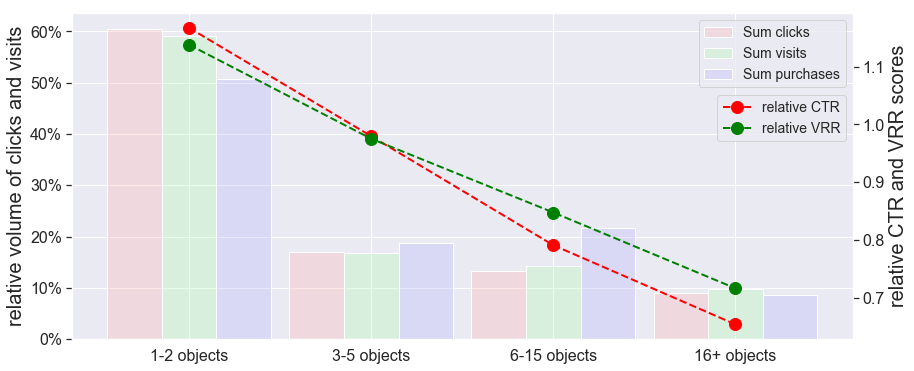

In [806]:
import matplotlib
from matplotlib import pyplot
fig, ax1 = plt.subplots(1,1,  figsize=(14, 6))
ax2 = ax1.twinx()

#ax2.plot(statsDF["Sum clicks"], color='grey', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax1.bar(statsDF.index - 0.3, statsDF["Sum clicks"], align='center', width=0.3, color=(0.99, 0.7, 0.7, 0.3), zorder=1)
ax1.bar(statsDF.index + 0.0, statsDF["Sum visits"], align='center', width=0.3, color=(0.7, 0.99, 0.7, 0.3), zorder=2)
ax1.bar(statsDF.index + 0.3, statsDF["Sum purchases"], align='center', width=0.3, color=(0.7, 0.7, 0.99, 0.3), zorder=3)
#ax2.plot(statsDF["Sum visits"], color='black', marker='o', linestyle='dashed',linewidth=2, markersize=12)

ax2.plot(statsDF["relative CTR"], color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12, zorder=4)
ax2.plot(statsDF["relative VRR"], color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12, zorder=5)
#ax.set_title('LM: predicted vs. real CTR')

ax2.yaxis.grid(False)
ax1.yaxis.grid(True)
ax2.set_ylabel('relative CTR and VRR scores', size=20)
ax1.set_ylabel('relative volume of clicks and visits', size=20)
ax1.set_xticks(range(0,4))#num of features
ax1.set_xticklabels(['1-2 objects', '3-5 objects', '6-15 objects', '16+ objects'])

#plt.legend(Gender,loc=2)
#ax1.legend(loc=2,  prop={'size': 14})
ax1.legend(["Sum clicks", "Sum visits", "Sum purchases"],  loc=1,  prop={'size': 14})
ax2.legend( bbox_to_anchor=(1, 0.77), prop={'size': 14})


matplotlib.rcParams.update({'font.size': 16, "axes.labelsize":20})
ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)

from matplotlib.ticker import FuncFormatter
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.savefig("relative_ctr_vrr2.png",dpi=300)

In [850]:
resOO_1_2["ctr"] = resOO_1_2.cnt / resSO_1_2.cnt
resOO_3_5["ctr"] = resOO_3_5.cnt / resSO_3_5.cnt
resOO_6_15["ctr"] = resOO_6_15.cnt / resSO_6_15.cnt
resOO_16_["ctr"] = resOO_16_.cnt / resSO_16_.cnt
resOO_ALL["ctr"] = resOO_ALL.cnt / resSO_ALL.cnt
resOO_1_5["ctr"] = (resOO_1_2.cnt+resOO_3_5.cnt) / (resSO_1_2.cnt+resSO_3_5.cnt)
resOO_1_5["SO"] = (resSO_1_2.cnt+resSO_3_5.cnt)
resOO_1_5["VO"] = (resVO_1_2.date+resVO_3_5.date)

resOO_ALL["SO"] = resSO_ALL.cnt
resOO_ALL["VO"] = resVO_ALL.date


resOO_1_2["vrr"] = resVO_1_2.date / resSO_1_2.cnt
resOO_3_5["vrr"] = resVO_3_5.date / resSO_3_5.cnt
resOO_6_15["vrr"] = resVO_6_15.date / resSO_6_15.cnt
resOO_16_["vrr"] = resVO_16_.date / resSO_16_.cnt
resOO_ALL["vrr"] = resVO_ALL.date / resSO_ALL.cnt
resOO_1_5["vrr"] = (resVO_1_2.date+resVO_3_5.date) / (resSO_1_2.cnt+resSO_3_5.cnt)


res1_2 = pd.concat([dfx, resOO_1_2], axis=1)
res1_5 = pd.concat([dfx, resOO_1_5], axis=1)
res3_5 = pd.concat([dfx, resOO_3_5], axis=1)
res6_15 = pd.concat([dfx, resOO_6_15], axis=1)
res16_ = pd.concat([dfx, resOO_16_], axis=1)
resALL = pd.concat([dfx, resOO_ALL], axis=1)


res1_2["inputSize"] = 1
res3_5["inputSize"] = 3
res6_15["inputSize"] = 6
res16_["inputSize"] = 16

resultX = pd.concat([res1_2, res3_5, res6_15, res16_], ignore_index=True)
resultX.head()


,alg,params,recAlg,noveltyEnhance,diversityEnhance,R^2,-mae,map,auc,mrr,...,novelty5_t,novelty10_t,novelty5_u,novelty10_u,ild5,ild10,cnt,ctr,vrr,inputSize
0,doc2vec,"128,1",last,no,yes,-56.531093,-0.292458,0.019624,0.617199,0.030860,...,0.238908,0.238984,0.828722,0.905254,0.783847,0.796964,47,0.007732,0.016615,1
1,doc2vec,"128,1",temporal,yes,no,-76.254189,-0.361817,0.022211,0.678597,0.031335,...,0.221947,0.223865,0.628722,0.742207,0.866049,0.838122,51,0.009145,0.022234,1
2,doc2vec,"32,5",mean,no,no,-114.389801,-0.455116,0.016662,0.554607,0.028117,...,0.213274,0.213457,0.721541,0.818214,0.762579,0.785867,48,0.008481,0.018905,1
3,doc2vec,"32,5",mean,yes,no,-114.389801,-0.455116,0.015012,0.554607,0.025444,...,0.215580,0.216342,0.775482,0.841156,0.905623,0.859131,41,0.006367,0.016307,1
4,doc2vec,"128,5",max,no,yes,-35.826269,-0.213745,0.010404,0.525640,0.012191,...,0.237284,0.232561,0.421366,0.569352,0.681573,0.740325,41,0.007679,0.018730,1


In [851]:
res1_5[["alg","cnt","VO","SO"]].groupby("alg").sum()

,cnt,VO,SO
alg,,,
attributeCosineSim,146,363,22318
doc2vec,228,683,38899
word2vec,188,549,28851


In [855]:
from statsmodels.stats.proportion import proportions_ztest
count = [188,228]
nobs = [28851, 38899]
stat, pval = proportions_ztest(count, nobs)
pval

0.28059042607977014

In [856]:
res1_5[["alg","cnt","VO","SO"]]

,alg,cnt,VO,SO
recVariant,,,,
0,doc2vec,47,140,8198
1,doc2vec,51,157,7844
2,doc2vec,48,129,7206
3,doc2vec,41,127,8383
4,doc2vec,41,130,7268
5,attributeCosineSim,35,64,6979
6,attributeCosineSim,74,187,8594
7,attributeCosineSim,37,112,6745
8,word2vec,49,142,6878


In [872]:
from statsmodels.stats.proportion import proportions_ztest
count = [41,53]
nobs = [8383, 7032]
stat, pval = proportions_ztest(count, nobs)
pval

0.03556141203099987

In [809]:
res1_5.loc[:,["alg","params","recAlg","-mae","auc","mrr","nDCG100","novelty10_t","novelty10_u","ild10","ctr","vrr"]]

,alg,params,recAlg,-mae,auc,mrr,nDCG100,novelty10_t,novelty10_u,ild10,ctr,vrr
recVariant,,,,,,,,,,,,
0,doc2vec,"128,1",last,-0.292458,0.617199,0.030860,0.057096,0.238984,0.905254,0.796964,0.007075,0.017077
1,doc2vec,"128,1",temporal,-0.361817,0.678597,0.031335,0.075085,0.223865,0.742207,0.838122,0.007904,0.020015
2,doc2vec,"32,5",mean,-0.455116,0.554607,0.028117,0.049527,0.213457,0.818214,0.785867,0.008881,0.017902
3,doc2vec,"32,5",mean,-0.455116,0.554607,0.025444,0.046461,0.216342,0.841156,0.859131,0.006322,0.015150
4,doc2vec,"128,5",max,-0.213745,0.525640,0.012191,0.031001,0.232561,0.569352,0.740325,0.007292,0.017887
5,attributeCosineSim,noSameObjects,temporal,-0.404018,0.796139,0.141881,0.210870,0.263165,0.958596,0.277244,0.005588,0.009170
6,attributeCosineSim,sameAllowed,mean,-0.400110,0.795160,0.147911,0.213630,0.232396,0.803684,0.223487,0.011171,0.021759
7,attributeCosineSim,sameAllowed,window10,-0.389602,0.782601,0.128227,0.204744,0.219898,0.800877,0.208355,0.007265,0.016605
8,word2vec,"64,5",mean,-0.372075,0.832782,0.106211,0.204329,0.217875,0.720557,0.666241,0.009450,0.020646


In [810]:
resALL.loc[:,["alg","params","recAlg","noveltyEnhance","diversityEnhance","ctr","vrr"]]

,alg,params,recAlg,noveltyEnhance,diversityEnhance,ctr,vrr
recVariant,,,,,,,
0,doc2vec,"128,1",last,no,yes,0.005602,0.014988
1,doc2vec,"128,1",temporal,yes,no,0.006838,0.017744
2,doc2vec,"32,5",mean,no,no,0.008594,0.016862
3,doc2vec,"32,5",mean,yes,no,0.006417,0.015531
4,doc2vec,"128,5",max,no,yes,0.006932,0.016636
5,attributeCosineSim,noSameObjects,temporal,no,yes,0.004760,0.008779
6,attributeCosineSim,sameAllowed,mean,no,yes,0.009922,0.018538
7,attributeCosineSim,sameAllowed,window10,no,no,0.008056,0.017033
8,word2vec,"64,5",mean,yes,no,0.007684,0.016564


In [811]:
res1_2.loc[:,["alg","params","recAlg","noveltyEnhance","diversityEnhance","ctr","vrr"]]

,alg,params,recAlg,noveltyEnhance,diversityEnhance,ctr,vrr
recVariant,,,,,,,
0,doc2vec,"128,1",last,no,yes,0.007732,0.016615
1,doc2vec,"128,1",temporal,yes,no,0.009145,0.022234
2,doc2vec,"32,5",mean,no,no,0.008481,0.018905
3,doc2vec,"32,5",mean,yes,no,0.006367,0.016307
4,doc2vec,"128,5",max,no,yes,0.007679,0.018730
5,attributeCosineSim,noSameObjects,temporal,no,yes,0.006553,0.009923
6,attributeCosineSim,sameAllowed,mean,no,yes,0.011821,0.022364
7,attributeCosineSim,sameAllowed,window10,no,no,0.007253,0.017055
8,word2vec,"64,5",mean,yes,no,0.009051,0.020687


In [812]:
res3_5.loc[:,["alg","params","recAlg","noveltyEnhance","diversityEnhance","ctr","vrr"]]

,alg,params,recAlg,noveltyEnhance,diversityEnhance,ctr,vrr
recVariant,,,,,,,
0,doc2vec,"128,1",last,no,yes,0.005191,0.018405
1,doc2vec,"128,1",temporal,yes,no,0.004852,0.014557
2,doc2vec,"32,5",mean,no,no,0.010349,0.014230
3,doc2vec,"32,5",mean,yes,no,0.006173,0.011317
4,doc2vec,"128,5",max,no,yes,0.006221,0.015552
5,attributeCosineSim,noSameObjects,temporal,no,yes,0.002442,0.006716
6,attributeCosineSim,sameAllowed,mean,no,yes,0.009426,0.020137
7,attributeCosineSim,sameAllowed,window10,no,no,0.007299,0.015207
8,word2vec,"64,5",mean,yes,no,0.010929,0.020492


In [813]:
res6_15.loc[:,["alg","params","recAlg","noveltyEnhance","diversityEnhance","ctr","vrr"]]

,alg,params,recAlg,noveltyEnhance,diversityEnhance,ctr,vrr
recVariant,,,,,,,
0,doc2vec,"128,1",last,no,yes,0.001761,0.012031
1,doc2vec,"128,1",temporal,yes,no,0.005820,0.015034
2,doc2vec,"32,5",mean,no,no,0.012172,0.016854
3,doc2vec,"32,5",mean,yes,no,0.006831,0.013661
4,doc2vec,"128,5",max,no,yes,0.003236,0.011327
5,attributeCosineSim,noSameObjects,temporal,no,yes,0.001431,0.007153
6,attributeCosineSim,sameAllowed,mean,no,yes,0.006545,0.009162
7,attributeCosineSim,sameAllowed,window10,no,no,0.008953,0.017906
8,word2vec,"64,5",mean,yes,no,0.007720,0.015895


In [814]:
res16_.loc[:,["alg","params","recAlg","noveltyEnhance","diversityEnhance","ctr","vrr"]]

,alg,params,recAlg,noveltyEnhance,diversityEnhance,ctr,vrr
recVariant,,,,,,,
0,doc2vec,"128,1",last,no,yes,0.006080,0.011693
1,doc2vec,"128,1",temporal,yes,no,0.003139,0.010672
2,doc2vec,"32,5",mean,no,no,0.002208,0.008830
3,doc2vec,"32,5",mean,yes,no,0.006711,0.022371
4,doc2vec,"128,5",max,no,yes,0.009524,0.017262
5,attributeCosineSim,noSameObjects,temporal,no,yes,0.004260,0.009585
6,attributeCosineSim,sameAllowed,mean,no,yes,0.005226,0.008711
7,attributeCosineSim,sameAllowed,window10,no,no,0.016260,0.020325
8,word2vec,"64,5",mean,yes,no,0.003046,0.006474


# correlations for individual user profile sizes

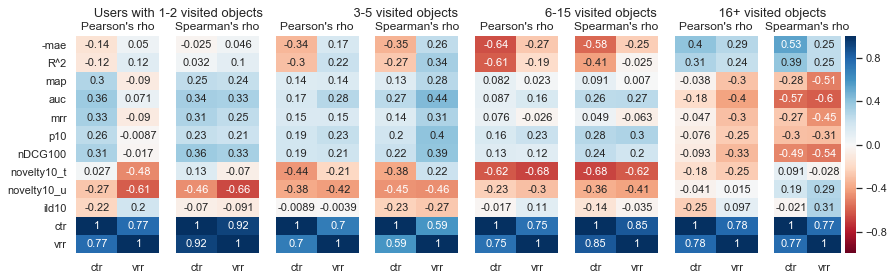

In [815]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,8,  figsize=(14, 4))

ax_i = 0
fig.suptitle("   Users with 1-2 visited objects                         3-5 visited objects                        6-15 visited objects                 16+ visited objects")
matplotlib.rcParams.update({'font.size': 11, "axes.titlesize":12})
for i in [1,3,6,16]:
    X = resultX.loc[resultX.inputSize == i]
    results_ = X[['-mae','R^2',
     'map',
     'auc',
     'mrr',
     #'p5',
     'p10',
     #'r5',
     #'r10', 
     #'nDCG10',                    
     'nDCG100',
     #'nDCG',   
     #'novelty5_t',
     'novelty10_t',                    
     #'novelty5_u',
     'novelty10_u',
     #'ild5',                    
     'ild10',
     'ctr',
     'vrr']]


    ax[ax_i].tick_params(axis='both', which='major', labelsize=11)
    ax[ax_i+1].tick_params(axis='both', which='major', labelsize=11)
    if ax_i == 0:
        sns.heatmap(results_.corr()[["ctr","vrr"]], annot=True, cbar=False, yticklabels=True,  ax = ax[ax_i], cmap="RdBu", vmin=-1, vmax=1)
        ax[ax_i].set_yticks(np.asarray(range(len(results_.columns)))+0.5, minor=False)
        ax[ax_i].set_yticklabels(results_.columns)
    else:
        sns.heatmap(results_.corr()[["ctr","vrr"]], annot=True, cbar=False, yticklabels=False,  ax = ax[ax_i], cmap="RdBu", vmin=-1, vmax=1)

    ax[ax_i].set_xticks(np.asarray(range(len(results_[["ctr","vrr"]].columns)))+0.5, minor=False)
    ax[ax_i].set_xticklabels(results_[["ctr","vrr"]].columns)
    
    
    ax[ax_i].set(title="Pearson's rho")

    if ax_i == 6:
        sns.heatmap(results_.corr(method='spearman')[["ctr","vrr"]], annot=True, cbar=True,  yticklabels=False, ax = ax[ax_i+1], cmap="RdBu", vmin=-1, vmax=1)    
    else:
        sns.heatmap(results_.corr(method='spearman')[["ctr","vrr"]], annot=True, cbar=False,  yticklabels=False, ax = ax[ax_i+1], cmap="RdBu", vmin=-1, vmax=1)    
    

    ax[ax_i+1].set_xticks(np.asarray(range(len(results_[["ctr","vrr"]].columns)))+0.5, minor=False)
    ax[ax_i+1].set_xticklabels(results_[["ctr","vrr"]].columns)
    ax[ax_i+1].set(title="Spearman's rho")
    ax_i += 2
    

#ax2.set_yticks(np.asarray(range(len(resultsX.columns)))+0.5, minor=False)
#ax2.set_yticklabels(resultsX.columns)
plt.savefig("three_correlations_2.png", dpi=300)

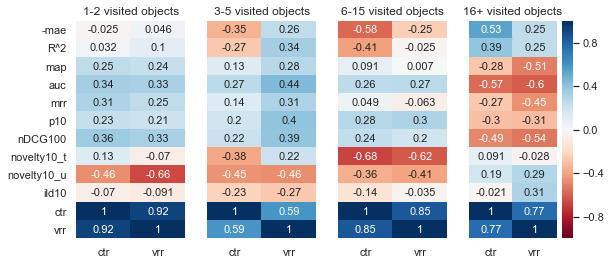

In [816]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,4,  figsize=(9, 4))

ax_i = 0
titles=["1-2 visited objects","3-5 visited objects","6-15 visited objects","16+ visited objects"]

matplotlib.rcParams.update({'font.size': 11, "axes.titlesize":12})
for i in [1,3,6,16]:
    X = resultX.loc[resultX.inputSize == i]
    results_ = X[['-mae','R^2',
     'map',
     'auc',
     'mrr',
     #'p5',
     'p10',
     #'r5',
     #'r10', 
     #'nDCG10',                    
     'nDCG100',
     #'nDCG',   
     #'novelty5_t',
     'novelty10_t',                    
     #'novelty5_u',
     'novelty10_u',
     #'ild5',                    
     'ild10',
     'ctr',
     'vrr']]


    ax[ax_i].tick_params(axis='both', which='major', labelsize=11)
    if ax_i == 0:
        sns.heatmap(results_.corr(method='spearman')[["ctr","vrr"]], annot=True, cbar=False,  yticklabels=False, ax = ax[ax_i], cmap="RdBu", vmin=-1, vmax=1)    
        ax[ax_i].set_yticks(np.asarray(range(len(results_.columns)))+0.5, minor=False)
        ax[ax_i].set_yticklabels(results_.columns)
    elif ax_i == 3:
        sns.heatmap(results_.corr(method='spearman')[["ctr","vrr"]], annot=True, cbar=True,  yticklabels=False, ax = ax[ax_i], cmap="RdBu", vmin=-1, vmax=1)    
    else:
        sns.heatmap(results_.corr(method='spearman')[["ctr","vrr"]], annot=True, cbar=False,  yticklabels=False, ax = ax[ax_i], cmap="RdBu", vmin=-1, vmax=1)    
    

    ax[ax_i].set_xticks(np.asarray(range(len(results_[["ctr","vrr"]].columns)))+0.5, minor=False)
    ax[ax_i].set_xticklabels(results_[["ctr","vrr"]].columns)
    ax[ax_i].set(title=titles[ax_i])
    ax_i += 1
    

#ax2.set_yticks(np.asarray(range(len(resultsX.columns)))+0.5, minor=False)
#ax2.set_yticklabels(resultsX.columns)
plt.savefig("three_correlations_3.png", dpi=300)

In [817]:
results_.columns

Index(['-mae', 'R^2', 'map', 'auc', 'mrr', 'p10', 'nDCG100', 'novelty10_t',
       'novelty10_u', 'ild10', 'ctr', 'vrr'],
      dtype='object')

In [818]:
np.asarray(range(len(results_.columns)))+0.5

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5])

In [819]:
resultX = pd.concat([res1_2, res3_5, res6_15], ignore_index=True)

In [820]:
resultX.shape

(36, 27)

# Train models for results w.r.t. user input sizes

In [821]:
X = resultX[['-mae','R^2',
 'map',
 'auc',
 'mrr',
 'p5',
 'p10',
 'r5',
 'r10', 
 'nDCG10',                    
 'nDCG100',
 'nDCG',   
 'novelty5_t',
 'novelty10_t',                    
 'novelty5_u',
 'novelty10_u',
 'ild5',                    
 'ild10',
 'inputSize']]
y =  resultX["ctr"]

from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)
x_names = polynomial_features.get_feature_names(X.columns)
X = pd.DataFrame(data=x_poly, columns=x_names)

0.016672899143588493
0.0025389796437195362
KendalltauResult(correlation=0.6126984126984127, pvalue=1.458958686391867e-07)


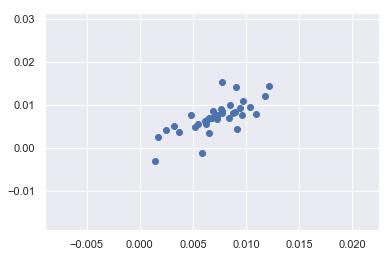

In [822]:
from sklearn.linear_model import LinearRegression
from scipy.stats import kendalltau
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

y_tst = []
y_pred = []
lm_ctr = LinearRegression(fit_intercept=True, normalize=True)
loocv = LeaveOneOut()
loocv.get_n_splits(X)

for train_index, test_index in loocv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        lm_ctr.fit(X_train, y_train)
        y_pred.append(lm_ctr.predict(X_test)[0])
        y_tst.append(y_test.values[0])
linear_ctr = lm_ctr
linear_ctr.fit(X, y)
print(r2_score(y_tst, y_pred))
print(np.sqrt(mean_squared_error(y_tst, y_pred)))
print(kendalltau(y_tst, y_pred))
plt.scatter(y_tst, y_pred)
linear_ctr_res = (y_tst, y_pred)
#print(list(zip(linear_ctr.coef_, X.columns) ))

0.42445711199698055
0.0019424464750155495
KendalltauResult(correlation=0.38730158730158737, pvalue=0.0008889600659915247)


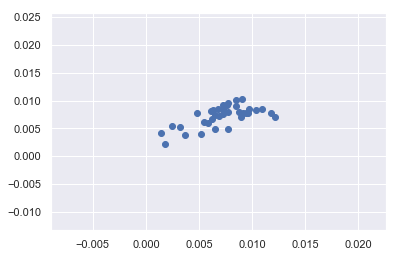

In [823]:
from sklearn.linear_model import LinearRegression
from scipy.stats import kendalltau
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

y_tst = []
y_pred = []
lm_ctr = Lasso(alpha = 0.00001, positive=False, fit_intercept=True, normalize=True)
loocv = LeaveOneOut()
loocv.get_n_splits(X)

for train_index, test_index in loocv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        lm_ctr.fit(X_train, y_train)
        y_pred.append(lm_ctr.predict(X_test)[0])
        y_tst.append(y_test.values[0])
lasso_ctr = lm_ctr
lasso_ctr.fit(X, y)
print(r2_score(y_tst, y_pred))
print(np.sqrt(mean_squared_error(y_tst, y_pred)))
print(kendalltau(y_tst, y_pred))
plt.scatter(y_tst, y_pred)
lasso_ctr_res = (y_tst, y_pred)
#print(list(zip(lasso_ctr.coef_, X.columns) ))

-0.2644290796621307
0.0028791046586878867
KendalltauResult(correlation=0.24063936001265795, pvalue=0.03961801385006478)


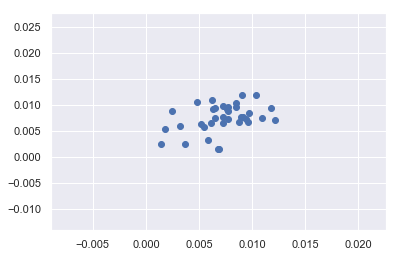

In [824]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import export_graphviz

y_tst = []
y_pred = []
lm_ctr = DecisionTreeRegressor(random_state=0, min_samples_split=2)
loocv = LeaveOneOut()
loocv.get_n_splits(X)

for train_index, test_index in loocv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        lm_ctr.fit(X_train, y_train)
        y_pred.append(lm_ctr.predict(X_test)[0])
        y_tst.append(y_test.values[0])

print(r2_score(y_tst, y_pred))
print(np.sqrt(mean_squared_error(y_tst, y_pred)))
print(kendalltau(y_tst, y_pred))
plt.scatter(y_tst, y_pred)

tree_ctr = lm_ctr
tree_ctr.fit(X, y)
export_graphviz(tree_ctr, "graph.dot", feature_names = X.columns)

tree_ctr_res = (y_tst, y_pred)

In [825]:
X = resultX[['-mae','R^2',
 'map',
 'auc',
 'mrr',
 'p5',
 'p10',
 'r5',
 'r10', 
 'nDCG10',                    
 'nDCG100',
 'nDCG',   
 'novelty5_t',
 'novelty10_t',                    
 'novelty5_u',
 'novelty10_u',
 'ild5',                    
 'ild10',
 'inputSize']]
y =  resultX["vrr"]

from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)
x_names = polynomial_features.get_feature_names(X.columns)
X = pd.DataFrame(data=x_poly, columns=x_names)

-0.9551414304093375
0.005550824105927887
KendalltauResult(correlation=0.2698412698412698, pvalue=0.020582742100569738)


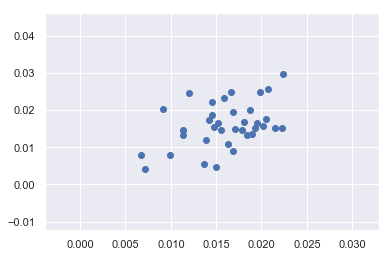

In [826]:
y_tst = []
y_pred = []
lm_ctr = LinearRegression(fit_intercept=True, normalize=True)
loocv = LeaveOneOut()
loocv.get_n_splits(X)

for train_index, test_index in loocv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        lm_ctr.fit(X_train, y_train)
        y_pred.append(lm_ctr.predict(X_test)[0])
        y_tst.append(y_test.values[0])
linear_vrr = lm_ctr
linear_vrr.fit(X, y)
print(r2_score(y_tst, y_pred))
print(np.sqrt(mean_squared_error(y_tst, y_pred)))
print(kendalltau(y_tst, y_pred))
plt.scatter(y_tst, y_pred)
linear_vrr_res = (y_tst, y_pred)

0.3479634746568798
0.0032055631614550653
KendalltauResult(correlation=0.4, pvalue=0.0005981203689041793)


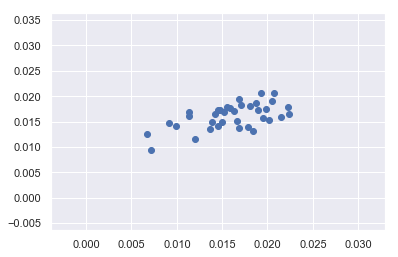

In [827]:
y_tst = []
y_pred = []
lm_ctr = Lasso(alpha = 0.00005, positive=False, fit_intercept=True, normalize=True)
loocv = LeaveOneOut()
loocv.get_n_splits(X)

for train_index, test_index in loocv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        lm_ctr.fit(X_train, y_train)
        y_pred.append(lm_ctr.predict(X_test)[0])
        y_tst.append(y_test.values[0])

lasso_vrr = lm_ctr
lasso_vrr.fit(X, y)
print(r2_score(y_tst, y_pred))
print(np.sqrt(mean_squared_error(y_tst, y_pred)))
print(kendalltau(y_tst, y_pred))
plt.scatter(y_tst, y_pred)
lasso_vrr_res = (y_tst, y_pred)
#list(zip(lasso_vrr.coef_, X.columns))

-0.11641746548668275
0.00419451437721437
KendalltauResult(correlation=0.21974633731030924, pvalue=0.0600561371642449)


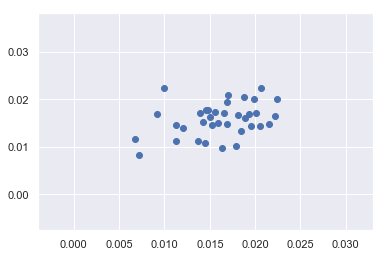

In [828]:
y_tst = []
y_pred = []
lm_ctr = DecisionTreeRegressor(random_state=0, min_samples_split=6)
loocv = LeaveOneOut()
loocv.get_n_splits(X)

for train_index, test_index in loocv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        lm_ctr.fit(X_train, y_train)
        y_pred.append(lm_ctr.predict(X_test)[0])
        y_tst.append(y_test.values[0])

print(r2_score(y_tst, y_pred))
print(np.sqrt(mean_squared_error(y_tst, y_pred)))
print(kendalltau(y_tst, y_pred))
plt.scatter(y_tst, y_pred)
tree_vrr = lm_ctr
tree_vrr.fit(X, y)
export_graphviz(tree_vrr, "graph_vrr.dot", feature_names = X.columns)

tree_vrr_res = (y_tst, y_pred)

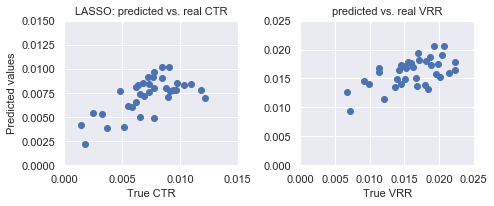

In [829]:
SMALL_SIZE = 11
MEDIUM_SIZE = 11
BIGGER_SIZE = 13

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7,3))

ax1.scatter(lasso_ctr_res[0], lasso_ctr_res[1])
ax2.scatter(lasso_vrr_res[0], lasso_vrr_res[1])

ax1.set_title('LASSO: predicted vs. real CTR')
ax2.set_title('predicted vs. real VRR')

ax1.set_xlim( left=0.0, right=0.015)
ax2.set_xlim( left=0.0, right=0.025)
ax1.set_ylim( bottom=0.0, top=0.015)
ax2.set_ylim( bottom=0.0, top=0.025)

ax1.set_xlabel("True CTR")
ax2.set_xlabel("True VRR")
ax1.set_ylabel("Predicted values")


plt.tight_layout()

plt.savefig("predicted_vs_true_ctr2.png", dpi=300)

# Get best algorithm variants 

In [830]:
X = dfMean[['-mae','R^2',
 'map',
 'auc',
 'mrr',
 'p5',
 'p10',
 'r5',
 'r10', 
 'nDCG10',                    
 'nDCG100',
 'nDCG',   
 'novelty5_t',
 'novelty10_t',                    
 'novelty5_u',
 'novelty10_u',
 'ild5',                    
 'ild10'
 ]]

for i in [1,3,6]:
    X['inputSize'] = i
   
    from sklearn.preprocessing import PolynomialFeatures
    polynomial_features = PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(X)
    x_names = polynomial_features.get_feature_names(X_all.columns)
    X_all = pd.DataFrame(data=x_poly, columns=x_names)
   
    
    y_pred = linear_ctr.predict(X_all)
    dfMean["ctr_pred_linear_is_"+str(i)] = y_pred
    y_pred = linear_vrr.predict(X_all)
    dfMean["vrr_pred_linear_is_"+str(i)] = y_pred        
    
    y_pred = lasso_ctr.predict(X_all)
    dfMean["ctr_pred_lasso_is_"+str(i)] = y_pred
    y_pred = lasso_vrr.predict(X_all)
    dfMean["vrr_pred_lasso_is_"+str(i)] = y_pred
    
    y_pred = tree_ctr.predict(X_all)
    dfMean["ctr_pred_tree_is_"+str(i)] = y_pred
    y_pred = tree_vrr.predict(X_all)
    dfMean["vrr_pred_tree_is_"+str(i)] = y_pred


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [831]:
idxs = dfMean[['ctr_pred_linear_is_1','ctr_pred_linear_is_3','ctr_pred_linear_is_6',
               'ctr_pred_lasso_is_1','ctr_pred_lasso_is_3','ctr_pred_lasso_is_6', 
               'ctr_pred_tree_is_1','ctr_pred_tree_is_3','ctr_pred_tree_is_6', 
               'vrr_pred_linear_is_1','vrr_pred_linear_is_3','vrr_pred_linear_is_6',
               'vrr_pred_lasso_is_1','vrr_pred_lasso_is_3','vrr_pred_lasso_is_6', 
               'vrr_pred_tree_is_1','vrr_pred_tree_is_3','vrr_pred_tree_is_6'
              ]].idxmax(axis=0)
dfMean.loc[idxs.values]

,alg,params,recAlg,noveltyEnhance,diversityEnhance,R^2,-mae,map,auc,mrr,...,ctr_pred_lasso_is_3,vrr_pred_lasso_is_3,ctr_pred_tree_is_3,vrr_pred_tree_is_3,ctr_pred_linear_is_6,vrr_pred_linear_is_6,ctr_pred_lasso_is_6,vrr_pred_lasso_is_6,ctr_pred_tree_is_6,vrr_pred_tree_is_6
14,attributeCosineSim,noSameObjects,temporal,yes,no,-104.080613,-0.406775,0.127418,0.795660,0.186189,...,0.005974,0.013646,0.002442,0.014839,4.155086e+08,-1.350936e+09,0.005229,0.011593,0.001596,0.012020
14,attributeCosineSim,noSameObjects,temporal,yes,no,-104.080613,-0.406775,0.127418,0.795660,0.186189,...,0.005974,0.013646,0.002442,0.014839,4.155086e+08,-1.350936e+09,0.005229,0.011593,0.001596,0.012020
14,attributeCosineSim,noSameObjects,temporal,yes,no,-104.080613,-0.406775,0.127418,0.795660,0.186189,...,0.005974,0.013646,0.002442,0.014839,4.155086e+08,-1.350936e+09,0.005229,0.011593,0.001596,0.012020
44,attributeCosineSim,sameAllowed,max,no,no,-105.844720,-0.417485,0.065056,0.788778,0.070162,...,0.011098,0.019417,0.010929,0.014839,-2.219102e+08,7.214926e+08,0.010927,0.017386,0.008805,0.014921
44,attributeCosineSim,sameAllowed,max,no,no,-105.844720,-0.417485,0.065056,0.788778,0.070162,...,0.011098,0.019417,0.010929,0.014839,-2.219102e+08,7.214926e+08,0.010927,0.017386,0.008805,0.014921
44,attributeCosineSim,sameAllowed,max,no,no,-105.844720,-0.417485,0.065056,0.788778,0.070162,...,0.011098,0.019417,0.010929,0.014839,-2.219102e+08,7.214926e+08,0.010927,0.017386,0.008805,0.014921
45,attributeCosineSim,sameAllowed,max,no,yes,-103.928899,-0.413749,0.078583,0.791722,0.099343,...,0.009197,0.016850,0.010929,0.020439,-3.117074e+08,1.013449e+09,0.008434,0.014581,0.006713,0.014921
89,doc2vec,"128,1",mean,no,yes,-78.943460,-0.367291,0.028619,0.675994,0.042747,...,0.007580,0.016247,0.011997,0.014839,1.911290e+07,-6.214142e+07,0.006032,0.013965,0.010929,0.014921
105,doc2vec,"128,1",temporal5,no,yes,-75.781961,-0.357991,0.020174,0.648094,0.027739,...,0.005803,0.013531,0.010349,0.007931,-4.650530e+07,1.512019e+08,0.003591,0.010923,0.011997,0.007931
565,word2vec,"32,1",max,no,yes,-75.639140,-0.358817,0.069970,0.832390,0.075514,...,0.009337,0.019172,0.010929,0.020439,-3.130676e+08,1.017871e+09,0.007950,0.017013,0.006713,0.014921


In [836]:
dt = dfMean.sort_values("ctr_pred_lasso_is_1", ascending=False)[["alg","params","recAlg","noveltyEnhance","diversityEnhance","ctr_pred_lasso_is_1","ctr_pred_lasso_is_3","ctr_pred_lasso_is_6"]]
dt.loc[(dt.alg=="attributeCosineSim")&(dt.recAlg=="mean")]

,alg,params,recAlg,noveltyEnhance,diversityEnhance,ctr_pred_lasso_is_1,ctr_pred_lasso_is_3,ctr_pred_lasso_is_6
50,attributeCosineSim,sameAllowed,mean,yes,no,0.008930,0.008496,0.007845
48,attributeCosineSim,sameAllowed,mean,no,no,0.008737,0.008319,0.007692
51,attributeCosineSim,sameAllowed,mean,yes,yes,0.008689,0.008073,0.007147
49,attributeCosineSim,sameAllowed,mean,no,yes,0.008508,0.007931,0.007066
10,attributeCosineSim,noSameObjects,mean,yes,no,0.006477,0.005978,0.005231
8,attributeCosineSim,noSameObjects,mean,no,no,0.006408,0.005926,0.005204
9,attributeCosineSim,noSameObjects,mean,no,yes,0.006253,0.005623,0.004678
11,attributeCosineSim,noSameObjects,mean,yes,yes,0.006246,0.005562,0.004536


In [839]:
dt = dfMean.sort_values("vrr_pred_lasso_is_1", ascending=False)[["alg","params","recAlg","noveltyEnhance","diversityEnhance","vrr_pred_lasso_is_1","vrr_pred_lasso_is_3","vrr_pred_lasso_is_6"]]
dt.loc[(dt.alg=="attributeCosineSim")&(dt.recAlg=="mean")]

,alg,params,recAlg,noveltyEnhance,diversityEnhance,vrr_pred_lasso_is_1,vrr_pred_lasso_is_3,vrr_pred_lasso_is_6
50,attributeCosineSim,sameAllowed,mean,yes,no,0.018039,0.016667,0.014609
48,attributeCosineSim,sameAllowed,mean,no,no,0.017895,0.016535,0.014494
51,attributeCosineSim,sameAllowed,mean,yes,yes,0.017285,0.015810,0.013597
49,attributeCosineSim,sameAllowed,mean,no,yes,0.017206,0.015759,0.013589
10,attributeCosineSim,noSameObjects,mean,yes,no,0.014987,0.013616,0.011560
8,attributeCosineSim,noSameObjects,mean,no,no,0.014971,0.013607,0.011560
9,attributeCosineSim,noSameObjects,mean,no,yes,0.014393,0.012943,0.010766
11,attributeCosineSim,noSameObjects,mean,yes,yes,0.014276,0.012796,0.010577


In [838]:
dt = dfMean.sort_values("ctr_pred_lasso_is_1", ascending=False)[["alg","params","recAlg","noveltyEnhance","diversityEnhance","ctr_pred_lasso_is_1","ctr_pred_lasso_is_3","ctr_pred_lasso_is_6"]]
dt.loc[(dt.alg=="word2vec")&(dt.recAlg=="mean")&(dt.params=="64,5")]

,alg,params,recAlg,noveltyEnhance,diversityEnhance,ctr_pred_lasso_is_1,ctr_pred_lasso_is_3,ctr_pred_lasso_is_6
768,word2vec,"64,5",mean,no,no,0.009972,0.009190,0.008016
770,word2vec,"64,5",mean,yes,no,0.009799,0.009024,0.007862
769,word2vec,"64,5",mean,no,yes,0.009748,0.008885,0.007591
771,word2vec,"64,5",mean,yes,yes,0.009577,0.008709,0.007408


In [840]:
dt = dfMean.sort_values("vrr_pred_lasso_is_1", ascending=False)[["alg","params","recAlg","noveltyEnhance","diversityEnhance","vrr_pred_lasso_is_1","vrr_pred_lasso_is_3","vrr_pred_lasso_is_6"]]
dt.loc[(dt.alg=="word2vec")&(dt.recAlg=="mean")&(dt.params=="64,5")]

,alg,params,recAlg,noveltyEnhance,diversityEnhance,vrr_pred_lasso_is_1,vrr_pred_lasso_is_3,vrr_pred_lasso_is_6
770,word2vec,"64,5",mean,yes,no,0.020530,0.019189,0.017176
768,word2vec,"64,5",mean,no,no,0.020499,0.019153,0.017134
769,word2vec,"64,5",mean,no,yes,0.020117,0.018711,0.016602
771,word2vec,"64,5",mean,yes,yes,0.020024,0.018615,0.016502


In [833]:
dfMean.sort_values("ctr_pred_lasso_is_1", ascending=False)[["alg","params","recAlg","noveltyEnhance","diversityEnhance","ctr_pred_linear_is_1","ctr_pred_lasso_is_1","ctr_pred_tree_is_1"]].head(20)

#d.loc[(d.alg=="word2vec")&(d.recAlg == "temporal")]

,alg,params,recAlg,noveltyEnhance,diversityEnhance,ctr_pred_linear_is_1,ctr_pred_lasso_is_1,ctr_pred_tree_is_1
44,attributeCosineSim,sameAllowed,max,no,no,-2.307930e+08,0.011212,0.008658
46,attributeCosineSim,sameAllowed,max,yes,no,-1.476892e+08,0.010769,0.008658
644,word2vec,"32,5",max,no,no,-9.927981e+07,0.010675,0.008658
564,word2vec,"32,1",max,no,no,-2.229731e+08,0.010537,0.008658
604,word2vec,"32,3",max,no,no,-1.533484e+08,0.010517,0.008658
47,attributeCosineSim,sameAllowed,max,yes,yes,-1.657461e+08,0.010438,0.011997
646,word2vec,"32,5",max,yes,no,2.581346e+07,0.010427,0.008658
645,word2vec,"32,5",max,no,yes,-2.260318e+08,0.010369,0.011997
606,word2vec,"32,3",max,yes,no,-4.016227e+06,0.010339,0.008658
488,word2vec,"128,3",mean,no,no,-2.778021e+07,0.010288,0.008658


In [747]:
dfMean.sort_values("ctr_pred_lasso_is_3", ascending=False)[["alg","params","recAlg","noveltyEnhance","diversityEnhance","ctr_pred_linear_is_3","ctr_pred_lasso_is_3","ctr_pred_tree_is_3"]].head(20)

,alg,params,recAlg,noveltyEnhance,diversityEnhance,ctr_pred_linear_is_3,ctr_pred_lasso_is_3,ctr_pred_tree_is_3
44,attributeCosineSim,sameAllowed,max,no,no,-2.307930e+08,0.011212,0.008307
46,attributeCosineSim,sameAllowed,max,yes,no,-1.476892e+08,0.010769,0.008307
644,word2vec,"32,5",max,no,no,-9.927981e+07,0.010675,0.008307
564,word2vec,"32,1",max,no,no,-2.229731e+08,0.010537,0.008307
604,word2vec,"32,3",max,no,no,-1.533484e+08,0.010517,0.008307
47,attributeCosineSim,sameAllowed,max,yes,yes,-1.657461e+08,0.010438,0.011448
646,word2vec,"32,5",max,yes,no,2.581346e+07,0.010427,0.008307
645,word2vec,"32,5",max,no,yes,-2.260318e+08,0.010369,0.011448
606,word2vec,"32,3",max,yes,no,-4.016227e+06,0.010339,0.008307
488,word2vec,"128,3",mean,no,no,-2.778021e+07,0.010288,0.008307


In [748]:
dfMean.sort_values("ctr_pred_lasso_is_6", ascending=False)[["alg","params","recAlg","noveltyEnhance","diversityEnhance","ctr_pred_linear_is_6","ctr_pred_lasso_is_6","ctr_pred_tree_is_6"]].head(20)

,alg,params,recAlg,noveltyEnhance,diversityEnhance,ctr_pred_linear_is_6,ctr_pred_lasso_is_6,ctr_pred_tree_is_6
44,attributeCosineSim,sameAllowed,max,no,no,-2.307930e+08,0.011212,0.008307
46,attributeCosineSim,sameAllowed,max,yes,no,-1.476892e+08,0.010769,0.008307
644,word2vec,"32,5",max,no,no,-9.927981e+07,0.010675,0.008307
564,word2vec,"32,1",max,no,no,-2.229731e+08,0.010537,0.008307
604,word2vec,"32,3",max,no,no,-1.533484e+08,0.010517,0.008307
47,attributeCosineSim,sameAllowed,max,yes,yes,-1.657461e+08,0.010438,0.011448
646,word2vec,"32,5",max,yes,no,2.581346e+07,0.010427,0.008307
645,word2vec,"32,5",max,no,yes,-2.260318e+08,0.010369,0.011448
606,word2vec,"32,3",max,yes,no,-4.016227e+06,0.010339,0.008307
488,word2vec,"128,3",mean,no,no,-2.778021e+07,0.010288,0.008307


## Predictions for VRR

In [750]:
dfMean.sort_values("vrr_pred_lasso_is_1", ascending=False)[["alg","params","recAlg","noveltyEnhance","diversityEnhance","vrr_pred_linear_is_1","vrr_pred_lasso_is_1","vrr_pred_tree_is_1"]].head(20)

,alg,params,recAlg,noveltyEnhance,diversityEnhance,vrr_pred_linear_is_1,vrr_pred_lasso_is_1,vrr_pred_tree_is_1
646,word2vec,"32,5",max,yes,no,-8.392684e+07,0.021374,0.020439
546,word2vec,"128,5",temporal5,yes,no,-5.948077e+08,0.021322,0.019956
644,word2vec,"32,5",max,no,no,3.227867e+08,0.021285,0.020439
544,word2vec,"128,5",temporal5,no,no,-3.989802e+08,0.021283,0.019956
536,word2vec,"128,5",temporal10,no,no,5.805529e+07,0.021257,0.019956
606,word2vec,"32,3",max,yes,no,1.305789e+07,0.021248,0.020439
538,word2vec,"128,5",temporal10,yes,no,-2.521708e+08,0.021230,0.019956
564,word2vec,"32,1",max,no,no,7.249485e+08,0.021214,0.020439
604,word2vec,"32,3",max,no,no,4.985790e+08,0.021202,0.020439
456,word2vec,"128,1",temporal10,no,no,6.155260e+07,0.021191,0.019956


In [753]:
dfMean.sort_values("vrr_pred_lasso_is_3", ascending=False)[["alg","params","recAlg","noveltyEnhance","diversityEnhance","vrr_pred_linear_is_3","vrr_pred_lasso_is_3","vrr_pred_tree_is_3"]].head(20)

,alg,params,recAlg,noveltyEnhance,diversityEnhance,vrr_pred_linear_is_3,vrr_pred_lasso_is_3,vrr_pred_tree_is_3
646,word2vec,"32,5",max,yes,no,-8.392684e+07,0.021374,0.020439
546,word2vec,"128,5",temporal5,yes,no,-5.948077e+08,0.021322,0.019956
644,word2vec,"32,5",max,no,no,3.227867e+08,0.021285,0.020439
544,word2vec,"128,5",temporal5,no,no,-3.989802e+08,0.021283,0.019956
536,word2vec,"128,5",temporal10,no,no,5.805529e+07,0.021257,0.019956
606,word2vec,"32,3",max,yes,no,1.305789e+07,0.021248,0.020439
538,word2vec,"128,5",temporal10,yes,no,-2.521708e+08,0.021230,0.019956
564,word2vec,"32,1",max,no,no,7.249485e+08,0.021214,0.020439
604,word2vec,"32,3",max,no,no,4.985790e+08,0.021202,0.020439
456,word2vec,"128,1",temporal10,no,no,6.155260e+07,0.021191,0.019956


In [756]:
dfMean.sort_values("vrr_pred_lasso_is_6", ascending=False)[["alg","params","recAlg","noveltyEnhance","diversityEnhance","vrr_pred_linear_is_6","vrr_pred_lasso_is_6","vrr_pred_tree_is_6"]].head(20)

,alg,params,recAlg,noveltyEnhance,diversityEnhance,vrr_pred_linear_is_6,vrr_pred_lasso_is_6,vrr_pred_tree_is_6
646,word2vec,"32,5",max,yes,no,-8.392684e+07,0.021374,0.020439
546,word2vec,"128,5",temporal5,yes,no,-5.948077e+08,0.021322,0.019956
644,word2vec,"32,5",max,no,no,3.227867e+08,0.021285,0.020439
544,word2vec,"128,5",temporal5,no,no,-3.989802e+08,0.021283,0.019956
536,word2vec,"128,5",temporal10,no,no,5.805529e+07,0.021257,0.019956
606,word2vec,"32,3",max,yes,no,1.305789e+07,0.021248,0.020439
538,word2vec,"128,5",temporal10,yes,no,-2.521708e+08,0.021230,0.019956
564,word2vec,"32,1",max,no,no,7.249485e+08,0.021214,0.020439
604,word2vec,"32,3",max,no,no,4.985790e+08,0.021202,0.020439
456,word2vec,"128,1",temporal10,no,no,6.155260e+07,0.021191,0.019956


In [757]:
dfMean.sort_values("vrr_pred_tree_is_6", ascending=False)[["alg","params","recAlg","noveltyEnhance","diversityEnhance","vrr_pred_linear_is_6","vrr_pred_lasso_is_6","vrr_pred_tree_is_6"]].head(20)

,alg,params,recAlg,noveltyEnhance,diversityEnhance,vrr_pred_linear_is_6,vrr_pred_lasso_is_6,vrr_pred_tree_is_6
77,attributeCosineSim,sameAllowed,window5,no,yes,1.894399e+08,0.017155,0.022364
603,word2vec,"32,3",last,yes,yes,-3.060062e+08,0.018278,0.022364
742,word2vec,"64,3",temporal3,yes,no,-3.694659e+08,0.020486,0.022364
517,word2vec,"128,3",window5,no,yes,-4.077997e+08,0.020010,0.022364
743,word2vec,"64,3",temporal3,yes,yes,-3.116015e+08,0.018177,0.022364
519,word2vec,"128,3",window5,yes,yes,-4.640482e+08,0.019474,0.022364
563,word2vec,"32,1",last,yes,yes,-3.925070e+07,0.017969,0.022364
745,word2vec,"64,3",temporal5,no,yes,8.726298e+07,0.018556,0.022364
525,word2vec,"128,5",max,no,yes,9.004785e+08,0.020107,0.022364
527,word2vec,"128,5",max,yes,yes,2.616613e+08,0.020082,0.022364


# Train models for user input sizes separately
## did not really work well

In [692]:
resultX = pd.concat([res1_2, res3_5, res6_15, res16_], ignore_index=True)

In [434]:
X = resultX[['-mae','R^2',
 'map',
 'auc',
 'mrr',
 'p5',
 'p10',
 'r5',
 'r10', 
 'nDCG10',                    
 'nDCG100',
 'nDCG',   
 'novelty5_t',
 'novelty10_t',                    
 'novelty5_u',
 'novelty10_u',
 'ild5',                    
 'ild10',
 'inputSize']]
y =  resultX["ctr"]
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)
x_names = polynomial_features.get_feature_names(X.columns)
X = pd.DataFrame(data=x_poly, columns=x_names)

-6.76294788858016
0.00713384304546102
KendalltauResult(correlation=0.1142857142857143, pvalue=0.3267385445526918)


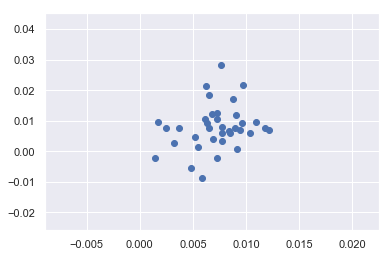

In [436]:
from sklearn.linear_model import LinearRegression
from scipy.stats import kendalltau
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
lm_ctr = {}
y_tst = []
y_pred = []
for i in [1,3,6]:
    Xi = X.loc[X.inputSize == i]
    yi = y.loc[X.inputSize == i]
              
    lm_ctr[i] = LinearRegression(fit_intercept=True, normalize=True)
    loocv = LeaveOneOut()
    loocv.get_n_splits(Xi)

    for train_index, test_index in loocv.split(Xi):
        X_train, X_test = Xi.iloc[train_index], Xi.iloc[test_index]
        y_train, y_test = yi.iloc[train_index], yi.iloc[test_index]
        lm_ctr[i].fit(X_train, y_train)
        y_pred.append(lm_ctr[i].predict(X_test)[0])
        y_tst.append(y_test.values[0])

print(r2_score(y_tst, y_pred))
print(np.sqrt(mean_squared_error(y_tst, y_pred)))
print(kendalltau(y_tst, y_pred))
plt.scatter(y_tst, y_pred)

[(0.0, '1'), (-0.0, '-mae'), (-0.0, 'R^2'), (0.0, 'map'), (0.0, 'auc'), (0.0, 'mrr'), (0.0, 'p5'), (0.0, 'p10'), (0.0, 'r5'), (0.0, 'r10'), (0.0, 'nDCG10'), (0.0, 'nDCG100'), (0.0, 'nDCG'), (0.0, 'novelty5_t'), (0.0, 'novelty10_t'), (-0.0, 'novelty5_u'), (-0.0, 'novelty10_u'), (-0.0, 'ild5'), (-0.0, 'ild10'), (0.0, 'inputSize'), (0.0, '-mae^2'), (0.0, '-mae R^2'), (-0.0, '-mae map'), (-0.0, '-mae auc'), (-0.0, '-mae mrr'), (-0.0, '-mae p5'), (-0.0, '-mae p10'), (-0.0, '-mae r5'), (-0.0, '-mae r10'), (-0.0, '-mae nDCG10'), (-0.0, '-mae nDCG100'), (-0.0, '-mae nDCG'), (-0.0, '-mae novelty5_t'), (-0.0, '-mae novelty10_t'), (0.0, '-mae novelty5_u'), (0.0, '-mae novelty10_u'), (0.0, '-mae ild5'), (0.0, '-mae ild10'), (-0.0, '-mae inputSize'), (0.0, 'R^2^2'), (-0.0, 'R^2 map'), (-0.0, 'R^2 auc'), (-0.0, 'R^2 mrr'), (-0.0, 'R^2 p5'), (-0.0, 'R^2 p10'), (-0.0, 'R^2 r5'), (-0.0, 'R^2 r10'), (-0.0, 'R^2 nDCG10'), (-0.0, 'R^2 nDCG100'), (-0.0, 'R^2 nDCG'), (0.0, 'R^2 novelty5_t'), (0.0, 'R^2 nove

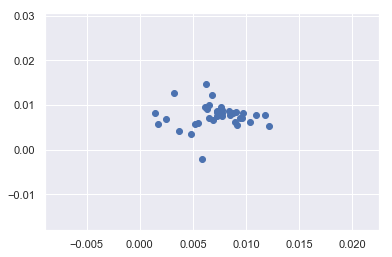

In [437]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

lasso_ctr = {}
y_tst = []
y_pred = []
for i in [1,3,6]:
    Xi = X.loc[X.inputSize == i]
    yi = y.loc[X.inputSize == i]
    lasso_ctr[i] = Lasso(alpha = 0.0001, positive=False, fit_intercept=True, normalize=True)
    loocv = LeaveOneOut()
    loocv.get_n_splits(Xi)

    for train_index, test_index in loocv.split(Xi):
        X_train, X_test = Xi.iloc[train_index], Xi.iloc[test_index]
        y_train, y_test = yi.iloc[train_index], yi.iloc[test_index]
        lasso_ctr[i].fit(X_train, y_train)
        y_pred.append(lasso_ctr[i].predict(X_test)[0])
        y_tst.append(y_test.values[0])
        
    lasso_ctr[i].fit(Xi, yi)
    print(list(zip(lasso_ctr[i].coef_, X.columns) ))
    
print(r2_score(y_tst, y_pred))
print(np.sqrt(mean_squared_error(y_tst, y_pred)))
print(kendalltau(y_tst, y_pred))


plt.scatter(y_tst, y_pred)



-0.9157526853317468
0.004336160136192983
KendalltauResult(correlation=0.19520859503587176, pvalue=0.0505213281822069)
[0.00784889069998456, 0.007142307369740962, 0.011260786565305658, 0.006501720299534507, 0.005188838590584878, 0.008438118122150161, 0.009589909513232492, 0.010837533572898619, 0.009135816456877171, 0.007842882695747504, 0.007449191138355627, 0.009257245264661634, 0.0043303129184897645, 0.004398092973875397, 0.010326425007609746, 0.006599024727221499, 0.005480538768011059, 0.002845233034869531, 0.010600219180486889, 0.010822270118521321, 0.00838543192255286, 0.009184932073738186, 0.007152307236032354, 0.009393426947521249, 0.004765342992002208, 0.004204619970889443, 0.003397737279802844, 0.006270143933859832, 0.007481219668162234, 0.00335092667361038, 0.008950576481878268, 0.010270970794826511, 0.010196341956223176, 0.00796479552056348, 0.006386543378872338, 0.007300494129606946, 0.0030168319565075175, 0.004740792106134389, 0.016260162601626018, 0.0024845876321435674, 0.

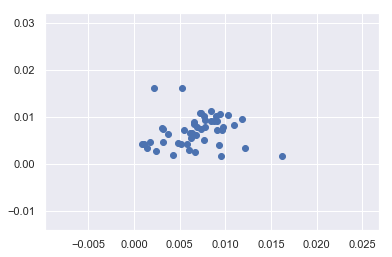

In [336]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import export_graphviz

regressor = DecisionTreeRegressor(random_state=0, min_samples_split=6)
loocv = LeaveOneOut()
loocv.get_n_splits(X)
y_tst = []
y_pred = []
for train_index, test_index in loocv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    regressor.fit(X_train, y_train)
    y_pred.append(regressor.predict(X_test)[0])
    y_tst.append(y_test.values[0])
    #print(regressor.decision_path(X_test),)

print(r2_score(y_tst, y_pred))
print(np.sqrt(mean_squared_error(y_tst, y_pred)))
print(kendalltau(y_tst, y_pred))
print(y_pred)

regressor.fit(X, y)
export_graphviz(regressor, "graph.dot", feature_names = X.columns)
plt.scatter(y_tst, y_pred)

## Best w.r.t. CTR

In [337]:
X_all = dfMean[['-mae','R^2',
 'map',
 'auc',
 'mrr',
 'p5',
 'p10',
 'r5',
 'r10', 
 'nDCG10',                    
 'nDCG100',
 'nDCG',   
 'novelty5_t',
 'novelty10_t',                    
 'novelty5_u',
 'novelty10_u',
 'ild5',                    
 'ild10'
 ]]
for i in [1,3,6]:
    X_all['inputSize'] = i
    y_pred = lasso_ctr[i].predict(X_all)
    dfMean["ctr_pred_lasso_is_"+str(i)] = y_pred
    
    y_pred = regressor.predict(X_all)
    dfMean["ctr_pred_tree_is_"+str(i)] = y_pred


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


KeyError: 1

In [338]:
dfMean.head(20)

,alg,params,recAlg,noveltyEnhance,diversityEnhance,R^2,-mae,map,auc,mrr,...,ctr_pred_lasso_is_3,vrr_pred_lasso_is_3,ctr_pred_tree_is_3,vrr_pred_tree_is_3,ctr_pred_linear_is_6,vrr_pred_linear_is_6,ctr_pred_lasso_is_6,vrr_pred_lasso_is_6,ctr_pred_tree_is_6,vrr_pred_tree_is_6
0,attributeCosineSim,noSameObjects,last,no,no,-91.750598,-0.374788,0.098748,0.736651,0.134822,...,0.005420,0.012405,0.004366,0.015017,-2.280503e+09,-7.657680e+08,0.004251,0.010017,0.002302,0.013663
1,attributeCosineSim,noSameObjects,last,no,yes,-91.625539,-0.376140,0.094245,0.737903,0.129612,...,0.005806,0.013042,0.004366,0.015017,-4.383324e+09,-1.471872e+09,0.004637,0.010654,0.002302,0.013663
2,attributeCosineSim,noSameObjects,last,yes,no,-91.750598,-0.374788,0.100174,0.736651,0.135567,...,0.005294,0.012485,0.004366,0.015017,-3.410363e+09,-1.145163e+09,0.004125,0.010097,0.002302,0.013663
3,attributeCosineSim,noSameObjects,last,yes,yes,-91.625539,-0.376140,0.093212,0.737903,0.128629,...,0.005767,0.012927,0.004366,0.015017,-2.728110e+09,-9.160696e+08,0.004598,0.010539,0.002302,0.013663
4,attributeCosineSim,noSameObjects,max,no,no,-108.691148,-0.422874,0.103098,0.794945,0.141116,...,0.007280,0.014880,0.004366,0.012774,-5.729772e+09,-1.923995e+09,0.006110,0.012492,0.002302,0.013663
5,attributeCosineSim,noSameObjects,max,no,yes,-104.980970,-0.414954,0.100752,0.795889,0.135486,...,0.007338,0.015545,0.004366,0.012774,-7.467691e+09,-2.507569e+09,0.006169,0.013157,0.002302,0.013663
6,attributeCosineSim,noSameObjects,max,yes,no,-108.691148,-0.422874,0.103304,0.794945,0.150283,...,0.006533,0.013792,0.004366,0.020137,-4.604725e+09,-1.546216e+09,0.005364,0.011404,0.002302,0.013663
7,attributeCosineSim,noSameObjects,max,yes,yes,-104.980970,-0.414954,0.099972,0.795889,0.138484,...,0.006747,0.014807,0.004366,0.020137,-5.627360e+09,-1.889606e+09,0.005578,0.012419,0.002302,0.013663
8,attributeCosineSim,noSameObjects,mean,no,no,-104.157311,-0.407293,0.124900,0.795449,0.176915,...,0.004861,0.010929,0.004366,0.007931,-9.549064e+08,-3.206472e+08,0.003691,0.008541,0.002302,0.007931
9,attributeCosineSim,noSameObjects,mean,no,yes,-101.738115,-0.402354,0.117162,0.795517,0.162046,...,0.005501,0.012641,0.004366,0.007931,-4.069181e+09,-1.366387e+09,0.004332,0.010253,0.002302,0.007931


In [339]:
X = resultX[['-mae','R^2',
 'map',
 'auc',
 'mrr',
 'p5',
 'p10',
 'r5',
 'r10', 
 'nDCG10',                    
 'nDCG100',
 'nDCG',   
 'novelty5_t',
 'novelty10_t',                    
 'novelty5_u',
 'novelty10_u',
 'ild5',                    
 'ild10',
 'inputSize']]
y =  resultX["vrr"]

-2.7537767318682524
0.00769135036516099
KendalltauResult(correlation=0.32063492063492066, pvalue=0.005933739984725714)


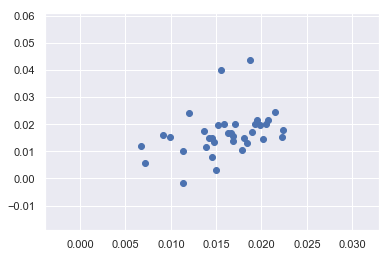

In [340]:
from sklearn.linear_model import LinearRegression
from scipy.stats import kendalltau
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
lm_vrr = {}
y_tst = []
y_pred = []
for i in [1,3,6]:
    Xi = X.loc[X.inputSize == i]
    yi = y.loc[X.inputSize == i]
              
    lm_vrr[i] = LinearRegression(fit_intercept=True, normalize=True)
    loocv = LeaveOneOut()
    loocv.get_n_splits(Xi)

    for train_index, test_index in loocv.split(Xi):
        X_train, X_test = Xi.iloc[train_index], Xi.iloc[test_index]
        y_train, y_test = yi.iloc[train_index], yi.iloc[test_index]
        lm_vrr[i].fit(X_train, y_train)
        y_pred.append(lm_vrr[i].predict(X_test)[0])
        y_tst.append(y_test.values[0])

print(r2_score(y_tst, y_pred))
print(np.sqrt(mean_squared_error(y_tst, y_pred)))
print(kendalltau(y_tst, y_pred))
plt.scatter(y_tst, y_pred)

[(0.0, '-mae'), (0.0, 'R^2'), (-0.0, 'map'), (0.0017076393171541163, 'auc'), (-0.0, 'mrr'), (-0.0, 'p5'), (-0.0, 'p10'), (-0.0, 'r5'), (0.0, 'r10'), (-0.0, 'nDCG10'), (0.0, 'nDCG100'), (-0.0, 'nDCG'), (0.0, 'novelty5_t'), (0.012610911449942442, 'novelty10_t'), (-0.010733853873105206, 'novelty5_u'), (-0.0, 'novelty10_u'), (0.0, 'ild5'), (0.0, 'ild10'), (0.0, 'inputSize')]
[(0.0, '-mae'), (3.3710216740000577e-06, 'R^2'), (-0.0, 'map'), (0.02030994810744669, 'auc'), (-0.0, 'mrr'), (-0.05396319084629676, 'p5'), (-0.0, 'p10'), (-0.0, 'r5'), (-0.0, 'r10'), (-0.0, 'nDCG10'), (-0.0, 'nDCG100'), (-0.0, 'nDCG'), (-0.0, 'novelty5_t'), (0.0, 'novelty10_t'), (-0.010777528101963904, 'novelty5_u'), (-0.0, 'novelty10_u'), (0.0017903998240959074, 'ild5'), (0.0, 'ild10'), (0.0, 'inputSize')]
[(-0.012898031992633882, '-mae'), (-0.0, 'R^2'), (-0.0, 'map'), (0.016739529985157462, 'auc'), (-0.038683227967095196, 'mrr'), (-0.0, 'p5'), (0.0, 'p10'), (-0.0, 'r5'), (0.0, 'r10'), (-0.0, 'nDCG10'), (0.0, 'nDCG100

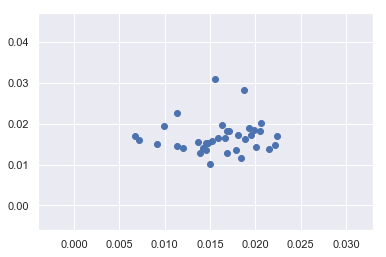

In [341]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

lasso_vrr = {}
y_tst = []
y_pred = []
for i in [1,3,6]:
    Xi = X.loc[X.inputSize == i]
    yi = y.loc[X.inputSize == i]
    lasso_vrr[i] = Lasso(alpha = 0.0001, positive=False, fit_intercept=True, normalize=True)
    loocv = LeaveOneOut()
    loocv.get_n_splits(Xi)

    for train_index, test_index in loocv.split(Xi):
        X_train, X_test = Xi.iloc[train_index], Xi.iloc[test_index]
        y_train, y_test = yi.iloc[train_index], yi.iloc[test_index]
        lasso_vrr[i].fit(X_train, y_train)
        y_pred.append(lasso_vrr[i].predict(X_test)[0])
        y_tst.append(y_test.values[0])
        
    lasso_vrr[i].fit(Xi, yi)
    print(list(zip(lasso_vrr[i].coef_, X.columns) ))
    
print(r2_score(y_tst, y_pred))
print(np.sqrt(mean_squared_error(y_tst, y_pred)))
print(kendalltau(y_tst, y_pred))


plt.scatter(y_tst, y_pred)



-0.5815825439035167
0.005824160136844811
KendalltauResult(correlation=0.048780492601363315, pvalue=0.6249397332979749)
[0.017817170347733884, 0.016658978011223374, 0.01735916657293598, 0.017878709310790605, 0.017394065446945946, 0.021761833610600856, 0.020131702958360084, 0.01772898943729501, 0.020467124909024022, 0.018554986756055228, 0.017522325388554444, 0.016894977168949773, 0.012777510284112347, 0.01131687242798354, 0.01131687242798354, 0.014859993011148473, 0.018848140904230756, 0.014136370607174136, 0.008936552529324845, 0.014082004966331555, 0.015017423346729898, 0.017857779409630504, 0.014172547824614032, 0.01953854269422596, 0.014404913683119984, 0.011465125419247137, 0.014478256221371926, 0.019172762785687057, 0.017261904761904763, 0.008741135533811157, 0.01950452077836426, 0.018323736005214673, 0.015056593010064998, 0.009272618813288386, 0.019119487902511265, 0.013194312927984736, 0.012254538491583427, 0.014540904408998351, 0.0213433004128699, 0.009794686509506267, 0.008027

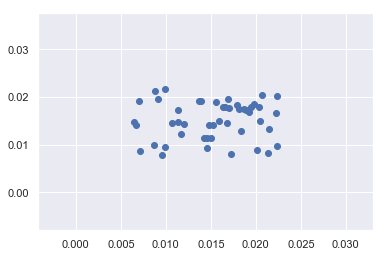

In [342]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import export_graphviz

regressor = DecisionTreeRegressor(random_state=0, min_samples_split=6)
loocv = LeaveOneOut()
loocv.get_n_splits(X)
y_tst = []
y_pred = []
for train_index, test_index in loocv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    regressor.fit(X_train, y_train)
    y_pred.append(regressor.predict(X_test)[0])
    y_tst.append(y_test.values[0])
    #print(regressor.decision_path(X_test),)

print(r2_score(y_tst, y_pred))
print(np.sqrt(mean_squared_error(y_tst, y_pred)))
print(kendalltau(y_tst, y_pred))
print(y_pred)

regressor.fit(X, y)
export_graphviz(regressor, "graph_vrr.dot", feature_names = X.columns)
plt.scatter(y_tst, y_pred)

## Prediction based on VRR

In [343]:
X_all = dfMean[['-mae','R^2',
 'map',
 'auc',
 'mrr',
 'p5',
 'p10',
 'r5',
 'r10', 
 'nDCG10',                    
 'nDCG100',
 'nDCG',   
 'novelty5_t',
 'novelty10_t',                    
 'novelty5_u',
 'novelty10_u',
 'ild5',                    
 'ild10'
 ]]
for i in [1,3,6]:    
    X_all['inputSize'] = i
    y_pred = lasso_vrr[i].predict(X_all)
    dfMean["vrr_pred_lasso_is_"+str(i)] = y_pred
    
    y_pred = regressor.predict(X_all)
    dfMean["vrr_pred_tree_is_"+str(i)] = y_pred

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [344]:
dfMean.head()

,alg,params,recAlg,noveltyEnhance,diversityEnhance,R^2,-mae,map,auc,mrr,...,ctr_pred_lasso_is_3,vrr_pred_lasso_is_3,ctr_pred_tree_is_3,vrr_pred_tree_is_3,ctr_pred_linear_is_6,vrr_pred_linear_is_6,ctr_pred_lasso_is_6,vrr_pred_lasso_is_6,ctr_pred_tree_is_6,vrr_pred_tree_is_6
0,attributeCosineSim,noSameObjects,last,no,no,-91.750598,-0.374788,0.098748,0.736651,0.134822,...,0.005420,0.012491,0.004366,0.015017,-2.280503e+09,-7.657680e+08,0.004251,0.011943,0.002302,0.015165
1,attributeCosineSim,noSameObjects,last,no,yes,-91.625539,-0.376140,0.094245,0.737903,0.129612,...,0.005806,0.012717,0.004366,0.015017,-4.383324e+09,-1.471872e+09,0.004637,0.012169,0.002302,0.015165
2,attributeCosineSim,noSameObjects,last,yes,no,-91.750598,-0.374788,0.100174,0.736651,0.135567,...,0.005294,0.012684,0.004366,0.015017,-3.410363e+09,-1.145163e+09,0.004125,0.011918,0.002302,0.015165
3,attributeCosineSim,noSameObjects,last,yes,yes,-91.625539,-0.376140,0.093212,0.737903,0.128629,...,0.005767,0.012706,0.004366,0.015017,-2.728110e+09,-9.160696e+08,0.004598,0.012222,0.002302,0.015165
4,attributeCosineSim,noSameObjects,max,no,no,-108.691148,-0.422874,0.103098,0.794945,0.141116,...,0.007280,0.013872,0.004366,0.020920,-5.729772e+09,-1.923995e+09,0.006110,0.013339,0.002302,0.015266


## Get best algorithms for VRR, CTR and input size

In [175]:
idxs = dfMean[['ctr_pred_lasso_is_1','ctr_pred_lasso_is_3','ctr_pred_lasso_is_6', 'vrr_pred_lasso_is_1',
        'vrr_pred_lasso_is_3','vrr_pred_lasso_is_6']].idxmax(axis=0)
dfMean.loc[idxs.values]

,alg,params,recAlg,noveltyEnhance,diversityEnhance,R^2,-mae,map,auc,mrr,...,ctr_pred_lasso_is_3,vrr_pred_lasso_is_3,ctr_pred_tree_is_3,vrr_pred_tree_is_3,ctr_pred_linear_is_6,vrr_pred_linear_is_6,ctr_pred_lasso_is_6,vrr_pred_lasso_is_6,ctr_pred_tree_is_6,vrr_pred_tree_is_6
688,word2vec,"64,1",mean,no,no,-107.587027,-0.448937,0.073294,0.811756,0.091635,...,0.011457,0.020233,0.009631,0.018961,3.498539e+06,8.018443e+07,0.010332,0.018195,0.008077,0.017301
688,word2vec,"64,1",mean,no,no,-107.587027,-0.448937,0.073294,0.811756,0.091635,...,0.011457,0.020233,0.009631,0.018961,3.498539e+06,8.018443e+07,0.010332,0.018195,0.008077,0.017301
688,word2vec,"64,1",mean,no,no,-107.587027,-0.448937,0.073294,0.811756,0.091635,...,0.011457,0.020233,0.009631,0.018961,3.498539e+06,8.018443e+07,0.010332,0.018195,0.008077,0.017301
768,word2vec,"64,5",mean,no,no,-91.185673,-0.413579,0.081689,0.809344,0.113680,...,0.010929,0.020549,0.009631,0.018961,9.455932e+06,2.167244e+08,0.009803,0.018511,0.008077,0.017301
768,word2vec,"64,5",mean,no,no,-91.185673,-0.413579,0.081689,0.809344,0.113680,...,0.010929,0.020549,0.009631,0.018961,9.455932e+06,2.167244e+08,0.009803,0.018511,0.008077,0.017301
768,word2vec,"64,5",mean,no,no,-91.185673,-0.413579,0.081689,0.809344,0.113680,...,0.010929,0.020549,0.009631,0.018961,9.455932e+06,2.167244e+08,0.009803,0.018511,0.008077,0.017301


In [178]:
dfMean.columns

Index(['alg', 'params', 'recAlg', 'noveltyEnhance', 'diversityEnhance', 'R^2',
       '-mae', 'map', 'auc', 'mrr', 'p5', 'p10', 'r5', 'r10', 'nDCG10',
       'nDCG100', 'nDCG', 'novelty5_t', 'novelty10_t', 'novelty5_u',
       'novelty10_u', 'ild5', 'ild10', 'ctr_pred_lasso_is_1',
       'ctr_pred_tree_is_1', 'ctr_pred_lasso_is_3', 'ctr_pred_tree_is_3',
       'ctr_pred_lasso_is_6', 'ctr_pred_tree_is_6', 'vrr_pred_lasso_is_1',
       'vrr_pred_tree_is_1', 'vrr_pred_lasso_is_3', 'vrr_pred_tree_is_3',
       'vrr_pred_lasso_is_6', 'vrr_pred_tree_is_6'],
      dtype='object')